## Name of the Project: ex.: Identifying the best predictors of massive transfusion in urban Level 1 Trauma Center

In [1]:
#Importing packages to be used
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.plotting
%matplotlib inline

from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from collections import Counter

pd.set_option('display.max_rows', 999) 
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 1000)

In [2]:
#reading in the Clinical and Demographics data (first tab) of .xlsx file and formatting the date containing variables
df1 = pd.read_excel('Trauma_Studies_Master_Data_2019_11_11.xlsx', sheet_name="Demographics & Clinical Course")
df1.head(3)

,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,timefrominjurytobleedcontrol,death,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 188,disposition
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,1.778,74.0,23.4,NaN,50,5,1,3,2,0,1,Blunt,Motorcycle Crash,0.0,NaN,90.0,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,250,0,1000,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1250.0,3,2,0,0,0,0,1250.0,3,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stovall,2.0,NaN,NaN,E,0.78,Y,0.8,TBI with Coagulopathy,,Inoperable massive head injury and had lysis o...,NP,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Death
1,C-002,M,Not_Hispanic_or_Latino,Black_or_African_American,26.0,1.676,65.7,23.4,NaN,1,0,0,0,0,0,0,Penetrating,Stab Wound,60.0

### Exploring clinical and demographics data
df1 dataset has 1067 observations and 202 features.
Command 'dtypes' breakes down all the features by Pandas data type; roughtly 1/3 of my features are floats, 1/3 are integers and 1/3 are objects. Command 'describe' shows basic distribution of all features to help with identifying data outliers and errors.
    

In [3]:
#df1.shape

#df1.dtypes

df1.describe()



,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,first_hospital_ethanol_result,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,tacticscore_ed,tacticscore_or,tacticscore_icu,timefrominjurytobleedcontrol,survival_time,los,icudays,ventdays,procedure10,complications_1_hospitalday,complications_2_hospitalday,complications_3_hospitalday,complications_4_hospitalday,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday
count,1067.000000,915.000000,980.000000,912.000000,942.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,997.000000,325.000000,1009.000000,999.000000,1067.000000,716.000000,1067.000000,718.000000,1056.000000,763.000000,60.000000,60.000000,60.00000,60.000000,0.0,93.000000,92.000000,87.000000,84.000000,1047.000000,847.000000,848.000000,271.000000,845.000000,846.000000,1027.000000,1017.000000,255.000000,260.000000,1014.000000,418.000000,600.000000,1028.000000,1036.000000,1036.000000,1036.000000,258.000000,1021.000000,1014.000000,427.000000,388.000000,827.000000,827.000000,827.000000,819.000000,827.000000,827.000000,827.000000,827.000000,607.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,986.000000,556.000000,508.000000,326.000000,155.000000,1067.000000,1067.000000,1067.000000,0.0,234.000000,93.000000,32.000000,12.000000,3.000000,0.0,0.0,0.0,0.0
mean,38.063355,1.741302,81.942167,27.090384,18.351380,24.255858,1.277413,0.381443,1.410497,1.059044,1.180881,0.765698,102.269809,60.972308,9

In [4]:
#exploring how many 'object' features there are in the dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Columns: 190 entries, id to disposition
dtypes: float64(71), int64(67), object(52)
memory usage: 1.5+ MB


In [5]:
#this shows how many unique values each variable has; this will help us to determine which ones are 
#worth converting to categorical variables
unique_counts = pd.DataFrame.from_records([(col, df1[col].nunique()) for col in df1.columns], 
                                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
35,field_protime,0
187,complications_7_hospitalday,0
186,complications_7,0
185,complications_6_hospitalday,0
184,complications_6,0
172,procedure10,0
74,first_hospital_amphetamines,1
115,hr6_12_aca_g,1
108,hr4_6_aca_g,1
75,first_hospital_barbiturates,1


### Data cleaning

In [6]:
#the table above showed we have 5 categories of 'fast_results' (6 with NaN). We should only have 4; printing out all unique values of a column
df1['fast_result'].unique()

array(['Negative', nan, 'Positive', 'Equivocal', 'Postivie', 'Postive'],
      dtype=object)

In [7]:
#finding misspelled values in a column

df1.loc[df1['fast_result'] == 'Postivie']
df1.loc[df1['fast_result'] == 'Postive']


,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,timefrominjurytobleedcontrol,death,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 188,disposition
669,10562,F,Hispanic_or_Latino,White,23.2,1.575,85.0,34.27,66.0,66,2,0,5,5,4,0,Blunt,MVC - Occupant,104.0,NaN,126.0,8.0,80,NaN,155,35.0,13.0,NaN,Y,Postive,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,7.17,31.0,NaN,11.0,-16.4,3.5,13.0,NaN,NaN,7.7,0.95,7.4,16.0,10.1,32.6,323.0,NaN,1.35,37.9,NaN,NaN,97.0,0.5,0.5,1.0,78.3,64.7,9.2,5.9,A POS,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,1300,6,6,1,1,0,1000,0,0,0,0,0,0,0,4000,2,0,0,0,0,0,3000.0,0,2,0,0,0,0,1300.0,13,7,1,1,0,1000,8300.0,15,9,1,1,0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fox,1.0,2.0,2.0,D,1.55,N,NaN,NaN,NaN,NaN,NaN,30,22,8,Laparotomy with splenectomy,Peripheral vascular,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bloodstream Infection,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home


In [8]:
#replacing misspelled values with the correct one

df1['fast_result'].replace(to_replace =["Postivie", "Postive"], value ="Positive", inplace=True) 

In [9]:
#df1

In [10]:
# making sure the replacement worked: yes, we have only 4 possible answeres

df1['fast_result']

0       Negative
1            NaN
2            NaN
3       Negative
4            NaN
          ...   
1062    Negative
1063    Negative
1064    Positive
1065    Negative
1066    Negative
Name: fast_result, Length: 1067, dtype: object

In [11]:
#feature 'fast_y' has an extra category ('y' instead of 'Y')
df1['fast_y'].unique()

array(['Y', 'N', 'y'], dtype=object)

In [12]:
#finding misspelled values in a column: three misspelled records found

df1.loc[df1['fast_y'] == 'y']
#df1.loc[df1['fast_y'] == ' y']
#df1.loc[df1['fast_y'] == 'y ']
#df1.loc[df1['fast_y'] == ' y ']


,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,timefrominjurytobleedcontrol,death,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 188,disposition
726,10619,M,Not_Hispanic_or_Latino,Unknown,59.1,1.600,76.0,29.69,36.0,48,4,2,4,0,0,1,Blunt,MVC - Occupant,146.0,80.0,50.0,13.0,140,80.0,136,46.0,11.0,36.9,y,Negative,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.05,7.20,42.0,79.0,16.0,-11.2,4.0,19.0,NaN,NaN,7.7,1.07,6.1,15.2,12.1,36.3,265.0,NaN,1.26,25.9,242.0,20.01,121.0,0.7,0.8,1.1,77.5,62.5,8.3,2.4,O POS,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,250,0,0,0,0,0,0,0,0,1000,1,0,0,0,0,0,700,0,0,0,0,0,0,600,0,0,0,0,0,0,2195,0,0,0,0,0,0,1000.0,0,0,0,0,0,0,2550.0,1,0,0,0,0,0,5745.0,1,0,0,0,0,0,Other,NaN,NaN,NaN,C5-7 ACDF,NaN,NaN,NaN,NaN,NaN,Fox,1.0,NaN,NaN,NaN,3.67,N,NaN,NaN,NaN,NaN,NaN,52,20,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pneumonia,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
755,10649,M,Not_Hispanic_or_Latino,White,74.5,1.930,109.0,29.26,10.0,19,0,0,0,0,3,1,Penetrating,Gunshot Wound (GSW),190.0,100.0,90.0,15.0,135,86

In [13]:
#replacing misspelled values with the correct one

df1['fast_y'].replace(to_replace =["y"], value ="Y", inplace=True) 

In [14]:
#making sure the replacement worked: yes, we now have only 'Y' and 'N'
df1['fast_y'].unique()

array(['Y', 'N'], dtype=object)

In [15]:
df1['mechanism'].unique()

array(['Motorcycle Crash', 'Stab Wound', 'MVC - Occupant',
       'Gunshot Wound (GSW)', 'Bicycle Accident', 'Assault',
       'Auto-Pedestrian', 'Fall: > 30 Feet', 'Struck By Or Against',
       'Fall: < 30 Feet', 'Amputation', 'Hit by Train', 'Explosion',
       'Fall: From Standing', 'Crush Injury', 'Found Down',
       'Laceration: Major/Arterial', 'Laceration: Minor', 'Thermal burn',
       'Scooter crash', 'Struck By Or Against '], dtype=object)

In [16]:
#finding misspelled values in a column (extra space in the end)

df1.loc[df1['mechanism'] == 'Struck By Or Against ']


,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,timefrominjurytobleedcontrol,death,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 188,disposition
1021,10925,M,Hispanic_or_Latino,White,44.4,1.727,85.0,28.5,27.0,50,5,1,0,0,0,1,Blunt,Struck By Or Against,70.0,40.0,96.0,10.0,139,95.0,104,17.0,7.0,NaN,Y,Negative,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,7.31,33.0,218.0,17.0,-8.9,3.3,17.0,0.74,134.0,7.0,0.99,3.0,6.9,12.9,39.3,196.0,15.8,1.27,20.5,238.0,1.14,97.0,0.4,0.5,1.2,75.6,62.8,8.5,0.7,O POS,Y,251.0,Y,POS,NaN,POS,NaN,NaN,NaN,1000,0,1000,1,0,0,0,0,0,1000,0,0,0,0,0,0,500,1,0,0,0,0,0,150,0,0,0,0,0,0,150,0,0,0,0,0,0,2900.0,0,0,0,0,0,0,3650.0,2,0,0,0,0,0,6700.0,2,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lawless,1.0,1.0,1.0,A,NaN,N,NaN,NaN,NaN,NaN,NaN,13,9,2,Craniotomy/Craniectomy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home


In [17]:
#replacing misspelled values with the correct one

df1.replace(to_replace=["Struck By Or Against "], value="Struck By Or Against", inplace=True) 



In [18]:
#making sure the replacement worked: yes, it did

df1.loc[df1['mechanism'] == 'Struck By Or Against ']
df1['mechanism'].unique()

array(['Motorcycle Crash', 'Stab Wound', 'MVC - Occupant',
       'Gunshot Wound (GSW)', 'Bicycle Accident', 'Assault',
       'Auto-Pedestrian', 'Fall: > 30 Feet', 'Struck By Or Against',
       'Fall: < 30 Feet', 'Amputation', 'Hit by Train', 'Explosion',
       'Fall: From Standing', 'Crush Injury', 'Found Down',
       'Laceration: Major/Arterial', 'Laceration: Minor', 'Thermal burn',
       'Scooter crash'], dtype=object)

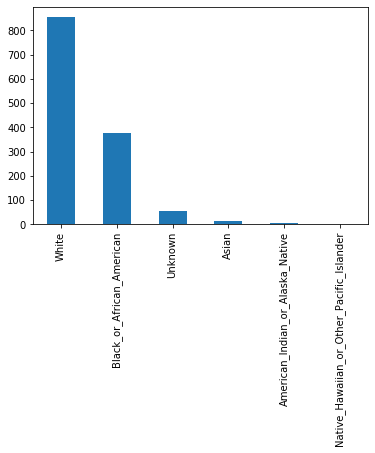

In [19]:
#data exploration on categorical variables
df1["sex"].value_counts().plot.bar()
df1["ethnicity"].value_counts().plot.bar()
df1["race"].value_counts().plot.bar()

plt.show()

In [20]:
#data exploration on continuous variables
df1.niss.describe()
df1.age.describe()
df1.bmi.describe()

count    912.000000
mean      27.090384
std        5.805344
min       15.150000
25%       23.270000
50%       25.810000
75%       29.802500
max       52.190000
Name: bmi, dtype: float64

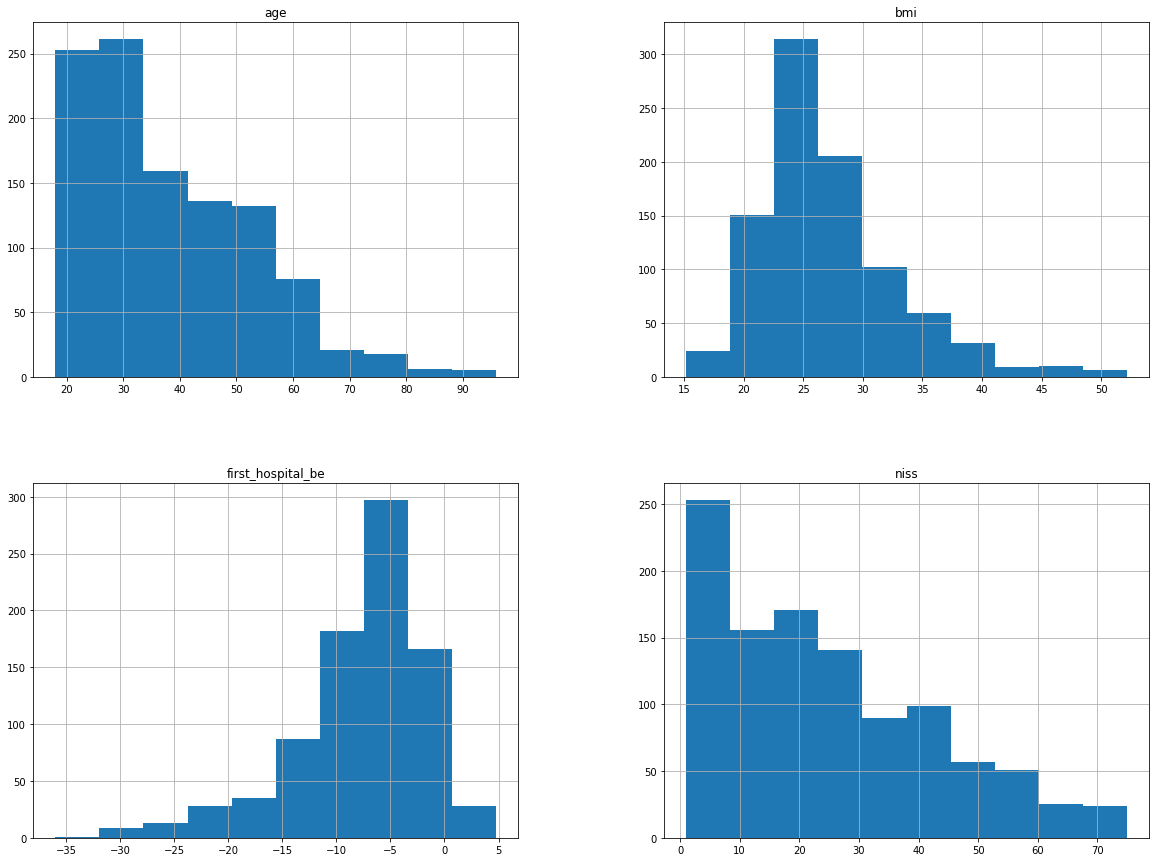

In [21]:
df = pd.DataFrame(df1, columns = ['age', 'niss', 'bmi', 'first_hospital_be'] ) 
plt.rcParams["figure.figsize"] = (20, 15)
  
# create histogram for numeric data 
df.hist() 
  
# show plot 
plt.show() 

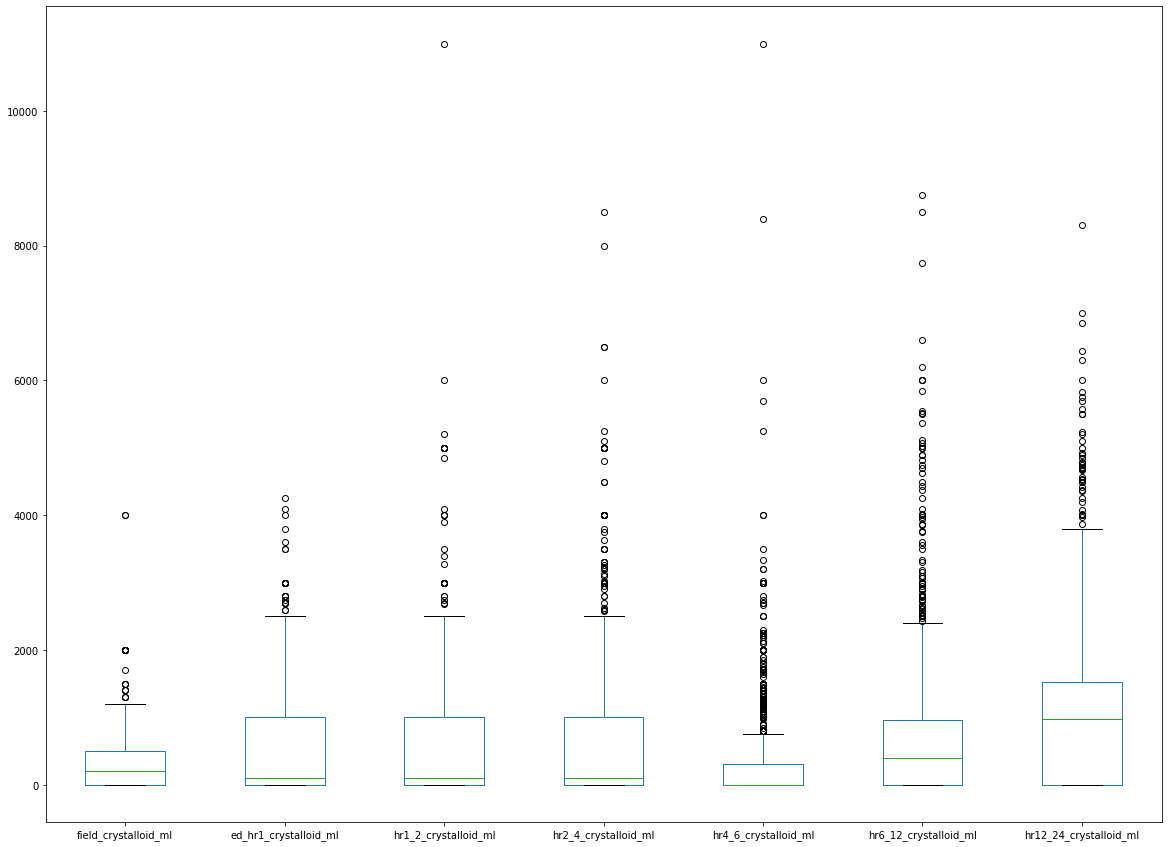

In [22]:
#graphing crystalloid infusion by time bin
df = pd.DataFrame(data = df1, columns = ['field_crystalloid_ml', 'ed_hr1_crystalloid_ml', 'hr1_2_crystalloid_ml', 
                                         'hr2_4_crystalloid_ml', 'hr4_6_crystalloid_ml', 'hr6_12_crystalloid_ml', 
                                         'hr12_24_crystalloid_ml'])
df.plot.box()


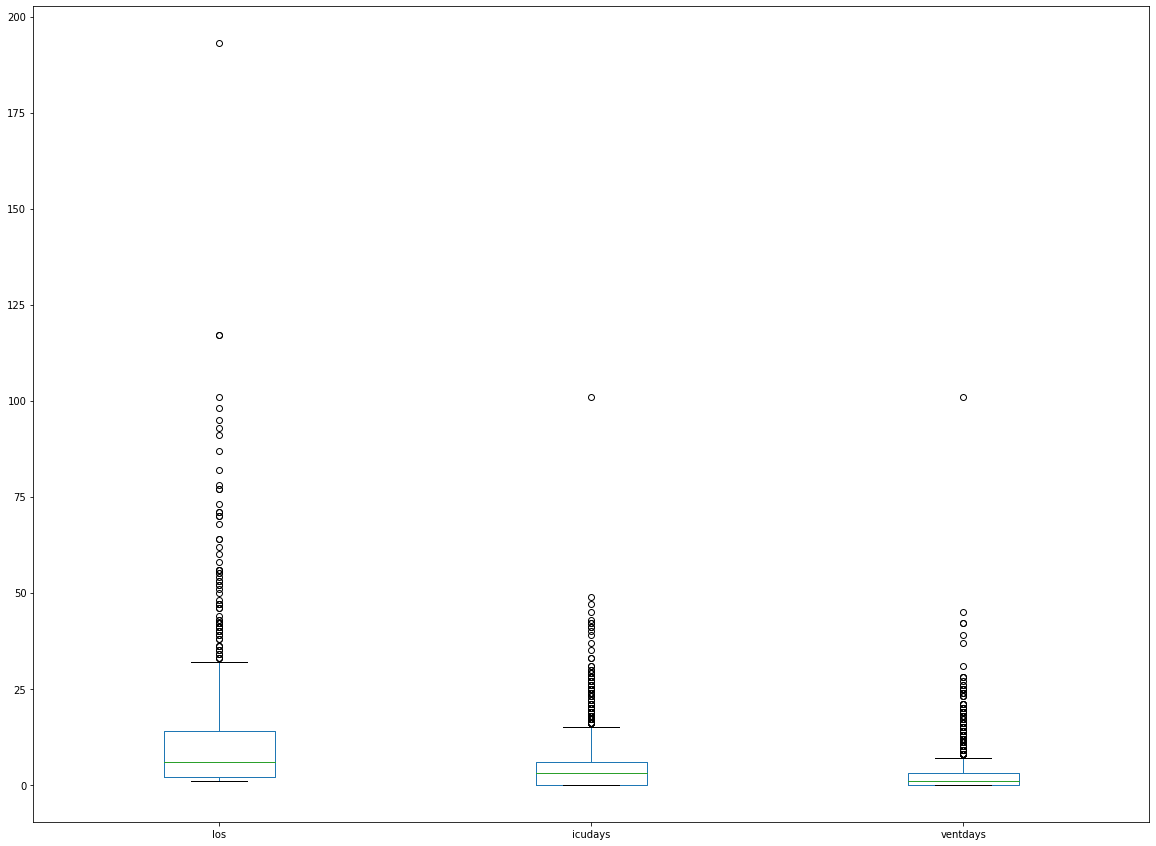

In [23]:
#graphing los, icudays and ventdays

df = pd.DataFrame(data = df1, columns = ['los', 'icudays', 'ventdays'])

df.head()
df.plot.box()


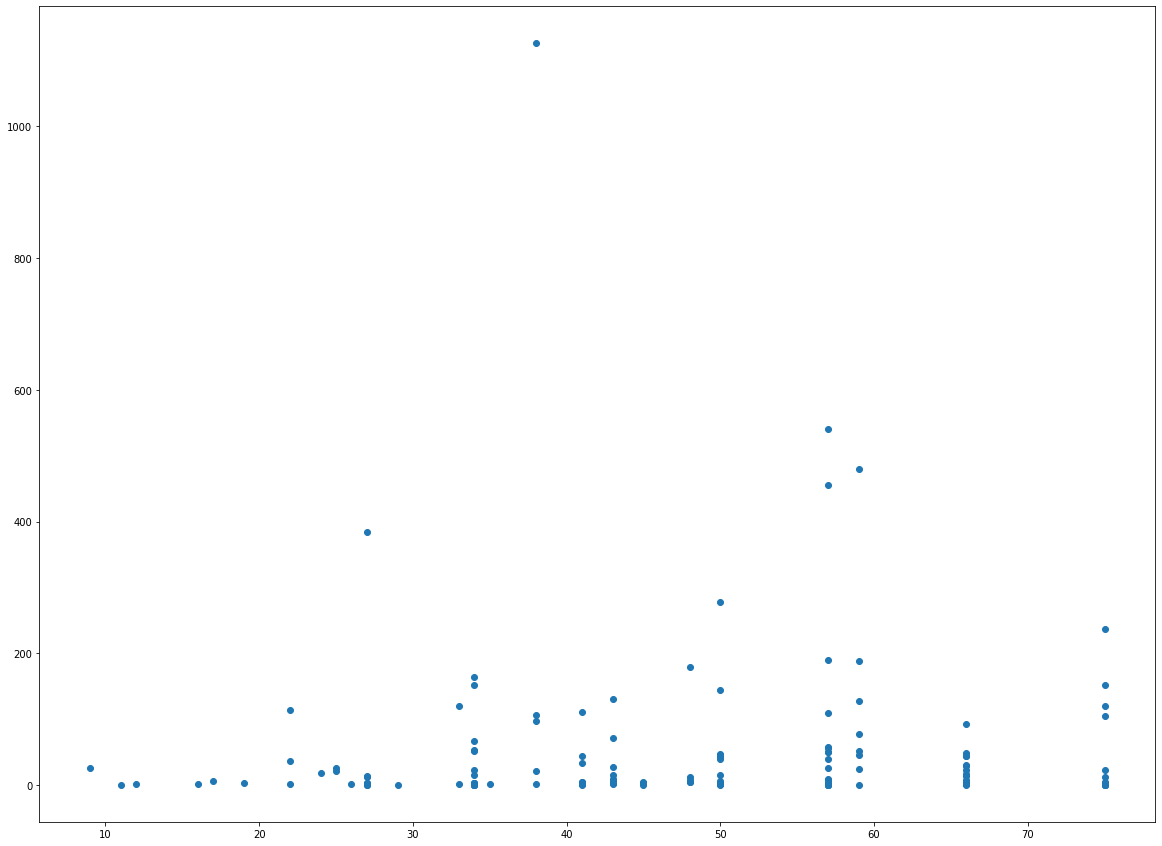

In [24]:
#length of survival of deceased patients in hours by severity of injury
plt.scatter(df1['niss'], df1['survival_time']) 
plt.show()

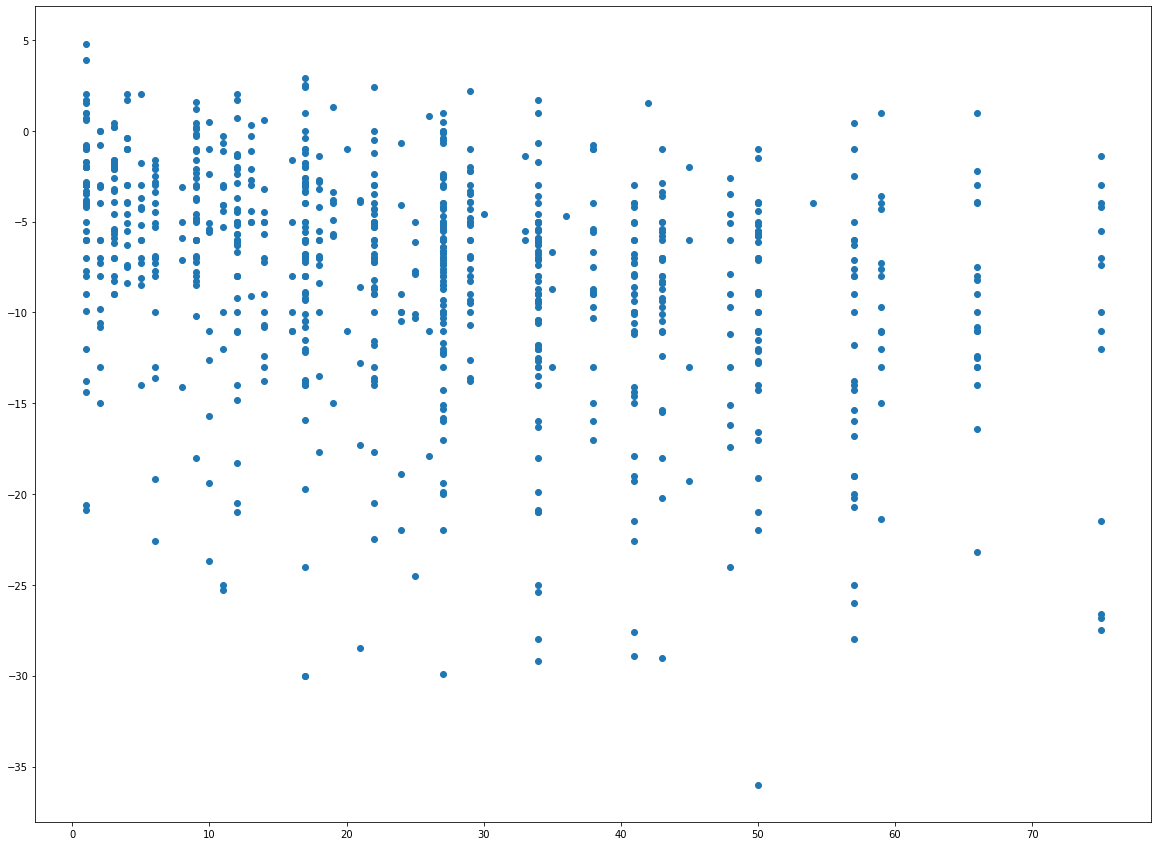

In [25]:
#degree of shock by severity of injury
plt.scatter(df1['niss'], df1['first_hospital_be']) 
plt.show()


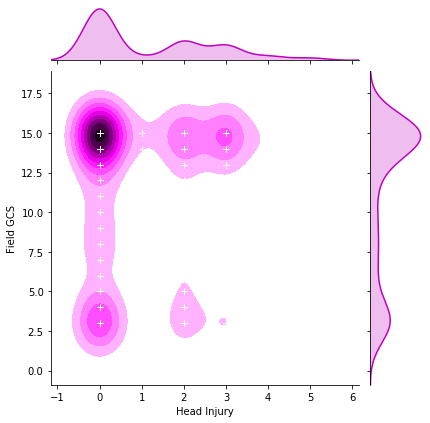

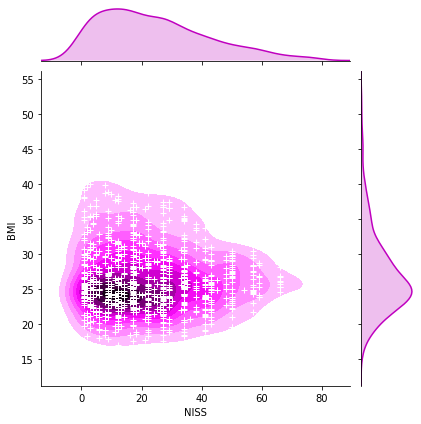

In [26]:
# Needs to be revisited after heatmap - visualizing some relationships with a joinplot
g = sns.jointplot(x="maxais_extremities", y="field_gcs", data=df1, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Head Injury", "Field GCS");

g = sns.jointplot(x="niss", y="bmi", data=df1, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("NISS", "BMI");

## Creating new variables, categorizing and formatting existing ones

In [27]:
#categorizing variable "age" into threee categories using Pandas.qcut function as well as categorizing variable "age" 
#into conventional categories using Pandas.cut function
df1['ageQgroup'] = pd.qcut(df1.age, 3, labels=["young", "middleage", "old"], retbins=False)
df1['ageGroup'] = pd.cut(df1.age, [0, 24, 34, 44, 54, 64, 100], labels=["18-24", "25-34", "35-44", "45-54", "55-64", 
                                                                        "65+"])

In [28]:
df1.head(5)

,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,timefrominjurytobleedcontrol,death,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 188,disposition,ageQgroup,ageGroup
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,1.778,74.0,23.4,NaN,50,5,1,3,2,0,1,Blunt,Motorcycle Crash,0.0,NaN,90.0,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,250,0,1000,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1250.0,3,2,0,0,0,0,1250.0,3,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stovall,2.0,NaN,NaN,E,0.78,Y,0.8,TBI with Coagulopathy,,Inoperable massive head injury and had lysis o...,NP,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Death,young,18-24
1,C-002,M,Not_Hispanic_or_Latino,Black_or_African_American,26.0,1.676,65.7,23.4,NaN,1,0,0,0,0,

In [29]:
#converting data type of some variables from 'object' to 'categorical' when appropriate

to_convert = ['death', 'preventability', 'sex', 'edt', 'bluntpenetrating', 'fast_y', 'ethnicity', 'fast_result', 
              'tacticscore_icu', 'tacticscore_or', 'tacticscore_ed', 'race', 'blood_type', 'mechanism', 'ageGroup', 
              'ageQgroup']; 
df1[to_convert] = df1[to_convert].astype('category')


In [30]:
#creating new variables to convert crystalloid fluids from mL to unit (1,000mL = 1 unit); later these variables will 
#be used to calculate Resuscitation Intensity (RI) score
df1 = df1.assign(field_crystalloid_unit=df1['field_crystalloid_ml']/1000,
           ed_hr1_crystalloid_unit=df1['ed_hr1_crystalloid_ml']/1000,
           hr1_2_crystalloid_unit=df1['hr1_2_crystalloid_ml']/1000,
           hr2_4_crystalloid_unit=df1['hr2_4_crystalloid_ml']/1000,
           hr4_6_crystalloid_unit=df1['hr4_6_crystalloid_ml']/1000,
           hr6_12_crystalloid_unit=df1['hr6_12_crystalloid_ml']/1000,
           hr12_24_crystalloid_unit=df1['hr12_24_crystalloid_ml']/1000)


In [31]:
print(df1.columns)
df1.head()

Index(['id', 'sex', 'ethnicity', 'race', 'age', 'height', 'weight', 'bmi', 'iss', 'niss',
       ...
       'disposition', 'ageQgroup', 'ageGroup', 'field_crystalloid_unit', 'ed_hr1_crystalloid_unit', 'hr1_2_crystalloid_unit', 'hr2_4_crystalloid_unit', 'hr4_6_crystalloid_unit', 'hr6_12_crystalloid_unit', 'hr12_24_crystalloid_unit'], dtype='object', length=199)


,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,timefrominjurytobleedcontrol,death,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 188,disposition,ageQgroup,ageGroup,field_crystalloid_unit,ed_hr1_crystalloid_unit,hr1_2_crystalloid_unit,hr2_4_crystalloid_unit,hr4_6_crystalloid_unit,hr6_12_crystalloid_unit,hr12_24_crystalloid_unit
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,1.778,74.0,23.4,NaN,50,5,1,3,2,0,1,Blunt,Motorcycle Crash,0.0,NaN,90.0,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,250,0,1000,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1250.0,3,2,0,0,0,0,1250.0,3,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stovall,2.0,NaN,NaN,E,0.78,Y,0.8,TBI with Coagulopathy,,Inoperable massive head injury and had lysis o...,NP,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Definitions of Massive Transfussion (MT):
 - mt_1 >= 10 units of RBCs in 24 hours
 - mt_2 >= 6 units of RBCs in 6 hours
 - mt_3 >= 4 units of RBCs in 4 hours
 - mt_4 >= 10 units of RBCs between ED and SICU admission
 - mt_cat >= 3 units of RBCs in first hour of resuscitation
 - mt_ri >= 4 units of combined fluids (crystalloid, colloids and blood products) in first 30 minutes of resuscitation

In [32]:
#creating new variables for MT definitions
df1['mt_1'] = ['yes' if x >= 10 else 'no' for x in df1['total24hrs_rbc_units']]
df1['mt_2'] = ['yes' if x >= 6 else 'no' for x in df1['total6hrs_rbc_units']]
df1['mt_3'] = ['yes' if x >= 4 else 'no' for x in (df1['ed_hr1_rbc_units'] + df1['hr1_2_rbc_units'] + 
                                                   df1['hr2_4_rbc_units'])]

#we do not record the time of SICU admission in the database, therefore, the mt_4 cannot be calculated
df1['mt_cat'] = ['yes' if x >= 3 else 'no' for x in df1['ed_hr1_rbc_units']]
df1['mt_ri'] = ['yes' if x >= 4 else 'no' for x in (df1 ['field_ffp'] + df1['ed_hr1_rbc_units'] + df1['ed_hr1_ffp_units'] + 
                                                    df1['ed_hr1_plt_units'] + df1['ed_hr1_cryo_units'] + 
                                                    df1['ed_hr1_crystalloid_unit'])]
df1.head(5)

,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,timefrominjurytobleedcontrol,death,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 188,disposition,ageQgroup,ageGroup,field_crystalloid_unit,ed_hr1_crystalloid_unit,hr1_2_crystalloid_unit,hr2_4_crystalloid_unit,hr4_6_crystalloid_unit,hr6_12_crystalloid_unit,hr12_24_crystalloid_unit,mt_1,mt_2,mt_3,mt_cat,mt_ri
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,1.778,74.0,23.4,NaN,50,5,1,3,2,0,1,Blunt,Motorcycle Crash,0.0,NaN,90.0,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,250,0,1000,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1250.0,3,2,0,0,0,0,1250.0,3,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stovall,2.0,NaN,NaN,E,0.78,Y,0.8,TBI with Coagulopathy,,Inoperable massive head injury and had lysis o...,NP,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN

In [33]:
# converting newly created features to categorical 

to_convert = ['mt_1', 'mt_2', 'mt_3', 'mt_cat', 'mt_ri']; 
df1[to_convert] = df1[to_convert].astype('category')


In [34]:
# check number & percentage of missing values in the columns
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df1)

Your selected dataframe has 204 columns and 1067 Rows.
There are 106 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
field_protime,0,1067,100.0,1067,100.0,float64
complications_7_hospitalday,0,1067,100.0,1067,100.0,float64
complications_7,0,1067,100.0,1067,100.0,float64
complications_6_hospitalday,0,1067,100.0,1067,100.0,float64
complications_6,0,1067,100.0,1067,100.0,float64
procedure10,0,1067,100.0,1067,100.0,float64
procedure_other,0,1066,99.9,1066,99.9,object
procedure9,0,1065,99.8,1065,99.8,object
complications_5_hospitalday,0,1064,99.7,1064,99.7,float64
first_hospital_methadone,0,1064,99.7,1064,99.7,object


## According to above table we have 70 variables with 50 or more percent of missing data. 

In [35]:
#creating a new df named "comps" with a dummy variable "vte" to combine "Pulmonary Embolus " (extra space in the .xlsx file) and "DVT"
df1['vte'] = df1.filter(regex="complications_\d+$").isin(['Pulmonary Embolus ', 'DVT']).sum(1)


#printing first 200 observations to make sure we count both "DVT" and "Pulmonary Embolus "
#df1.head(201)


In [36]:
#df1.vte.describe()

In [37]:
#replacing '2' with '1' to make "vte" dichotomous
df1.vte.replace(2, 1, inplace=True)

In [38]:
#df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


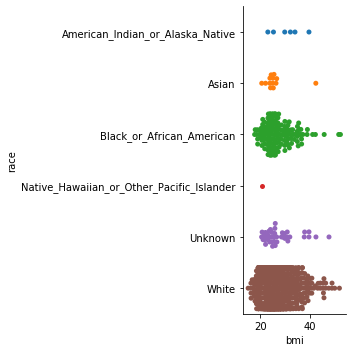

In [39]:
#creating a catplot to investigate the relationship between 'race' and 'bmi'

sns.catplot(x="bmi", y="race", kind="swarm", data=df1);

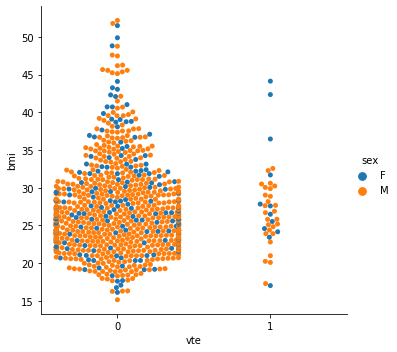

In [40]:
#creating a catplot to investigate the relationship between 'vte' and 'bmi' by 'sex'

sns.catplot(x="vte", y="bmi", hue="sex", kind="swarm", data=df1);

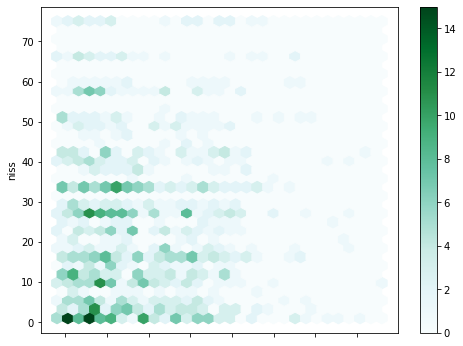

In [41]:
#visualizing two numeric features with hexbin
df1.plot.hexbin(x='age', y='niss', gridsize=30, figsize=(8,6))

In [42]:
#dropping columns we don't need for further analysis (either have high percentage of missing data or don't have 
#predictive value for our purposes)

df1_short = df1.drop(['coagulopathyremarks', 'comorbidity_1', 'comorbidity_2', 'comorbidity_3', 
                      'comorbidity_4', 'comorbidity_other', 'complications_1', 'complications_1_hospitalday', 
                      'complications_2', 'complications_2_hospitalday', 'complications_3', 
                      'complications_3_hospitalday', 'complications_4', 'complications_4_hospitalday', 
                      'complications_5', 'complications_5_hospitalday', 'complications_6', 
                      'complications_6_hospitalday', 'complications_7', 'complications_7_hospitalday',
                      'disposition', 'earlydeath', 'ed_hr1_aca_g', 'ed_hr1_cryo_units', 
                      'ed_hr1_crystalloid_ml', 'ed_hr1_crystalloid_unit', 'ed_hr1_ffp_units', 'ed_hr1_plt_units', 
                      'ed_hr1_rbc_units', 'ed_hr1_txa_mg', 'field_ddimer', 'field_fibrinogen', 'field_hct', 
                      'field_hgb', 'field_hr', 'field_inr', 'field_pltcount', 'field_protime', 'field_ptt', 
                      'field_wbc', 'first_hospital_amphetamines', 'first_hospital_barbiturates', 
                      'first_hospital_benzodiazepines', 'first_hospital_cocainemetabolites', 
                      'first_hospital_ethanol_performed', 'first_hospital_ethanol_result', 'first_hospital_methadone',
                      'first_hospital_opioids', 'height', 'hr12_24_aca_g', 'hr12_24_cryo_units', 
                      'hr12_24_crystalloid_ml', 'hr12_24_crystalloid_unit', 'hr12_24_ffp_units', 'hr12_24_plt_units', 
                      'hr12_24_rbc_units', 'hr12_24_txa_mg', 'hr1_2_aca_g', 'hr1_2_cryo_units', 'hr1_2_crystalloid_ml',
                      'hr1_2_crystalloid_unit', 'hr1_2_ffp_units', 'hr1_2_plt_units', 'hr1_2_rbc_units', 
                      'hr1_2_txa_mg', 'hr2_4_aca_g', 'hr2_4_cryo_units', 'hr2_4_crystalloid_ml', 
                      'hr2_4_crystalloid_unit', 'hr2_4_ffp_units', 'hr2_4_plt_units', 'hr2_4_rbc_units', 
                      'hr2_4_txa_mg', 'hr4_6_aca_g', 'hr4_6_cryo_units', 'hr4_6_crystalloid_ml', 
                      'hr4_6_crystalloid_unit', 'hr4_6_ffp_units', 'hr4_6_plt_units', 'hr4_6_rbc_units', 
                      'hr4_6_txa_mg', 'hr6_12_aca_g', 'hr6_12_cryo_units', 'hr6_12_crystalloid_ml', 
                      'hr6_12_crystalloid_unit', 'hr6_12_ffp_units', 'hr6_12_plt_units', 'hr6_12_rbc_units', 
                      'hr6_12_txa_mg', 'icudays', 'injury_class', 'iss', 
                      'latedeath', 'los', 'medication_1', 'medication_2', 'medication_3', 'medication_4', 
                      'medication_other', 'preventability', 'procedure1', 'procedure10', 'procedure2', 'procedure3', 
                      'procedure4', 'procedure5', 'procedure6', 'procedure7', 'procedure8', 'procedure9', 
                      'procedure_other', 'surgery_attending', 'survival_time', 'tacticscore_ed', 'tacticscore_icu', 
                      'tacticscore_or', 'total24hrs_aca_g', 'total24hrs_cryo_units', 'total24hrs_crystalloid_ml', 
                      'total24hrs_ffp_units', 'total24hrs_plt_units', 'total24hrs_rbc_units', 'total24hrs_txa_mg', 
                      'total6hrs_aca_g', 'total6hrs_cryo_units', 'total6hrs_crystalloid_ml', 'total6hrs_ffp_units', 
                      'total6hrs_plt_units', 'total6hrs_rbc_units', 'total6hrs_txa_mg', 'ventdays', 'vte', 'weight'], 
                     axis=1)
#df1_short = df.drop(df1.columns[0], axis =1)
df1_short.columns

Index(['id', 'sex', 'ethnicity', 'race', 'age', 'bmi', 'niss', 'maxais_headneck', 'maxais_face', 'maxais_chest', 'maxais_abdomenpelvis', 'maxais_extremities', 'maxais_external', 'bluntpenetrating', 'mechanism', 'field_sbp', 'field_dbp', 'field_gcs', 'ed_sbp', 'ed_dbp', 'ed_hr', 'ed_rr', 'ed_gcs', 'ed_temp', 'fast_y', 'fast_result', 'edt', 'arrival_lab_timefrominj', 'first_hospital_ph', 'first_hospital_paco2', 'first_hospital_pao2', 'first_hospital_bicarb', 'first_hospital_be', 'first_hospital_potassium', 'first_hospital_vco2', 'first_hospital_creatinine', 'first_hospital_glucose', 'first_hospital_calcium', 'first_hospital_ioncalcium', 'first_hospital_lactate', 'first_hospital_wbc', 'first_hospital_hgb', 'first_hospital_hct', 'first_hospital_pltcount', 'first_hospital_protime', 'first_hospital_inr', 'first_hospital_ptt', 'first_hospital_fibrinogen', 'first_hospital_ddimer', 'first_hospital_act', 'first_hospital_sp', 'first_hospital_r', 'first_hospital_k', 'first_hospital_angle',
       

In [43]:
#examining the abbreviated dataset

df1_short.describe()

,age,bmi,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,field_sbp,field_dbp,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,field_crystalloid_ml,field_ffp,timefrominjurytobleedcontrol,field_crystalloid_unit
count,1067.000000,912.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,997.000000,325.000000,999.000000,1067.000000,716.000000,1067.000000,718.000000,1056.000000,763.000000,1047.000000,847.000000,848.000000,271.000000,845.000000,846.000000,1027.000000,1017.000000,255.000000,260.000000,1014.000000,418.000000,600.000000,1028.000000,1036.000000,1036.000000,1036.000000,258.000000,1021.000000,1014.000000,427.000000,388.000000,827.000000,827.000000,827.000000,819.000000,827.000000,827.000000,827.000000,827.000000,1067.000000,1067.000000,326.000000,1067.000000
mean,38.063355,27.090384,24.255858,1.277413,0.381443,1.410497,1.059044,1.180881,0.765698,102.269809,60.972308,10.995996,111.593252,71.459497,94.864105,20.942897,11.176136,36.423578,0.606103,7.292609,37.863208,165.918819,18.123077,-7.759220,3.606339,20.447001,1.018627,153.603846,8.089250,1.045933,5.361500,10.870136,13.717857,41.614961,252.856178,15.086434,1.226259,30.963383,233.353536,6.333420,123.720677,0.618259,0.794559,1.585836,72.549577,59.977630,8.122854,5.022854,302.054358,0.119963,2.278865,0.302054
std,14.787477,5.805344,19.048451,1.850380,0.789086,1.691553,1.554296,1.452206,0.670628,44.414559,33.212501,4.883203,41.698298,27.425776,33.182300,6.654940,4.937067,1.080984,0.603216,0.148973,10.771104,100.741183,4.398567,6.127561,0.724896,4.173024,0.275049,83.683219,1.001585,0.283636,4.422643,5.530710,2.303570,6.373130,86.159012,3.247904,0.411381,18.059891,91.300971,7.300775,75.606126,0.332126,0.800957,1.380875,9.091405,9.974154,2.648102,14.455651,413.064556,0.473148,3.286750,0.413065
min,18.000000,15.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,26.300000,0.070000,6.610000,11.000000,34.000000,3.000000,-36.000000,1.800000,5.000000,0.460000,61.000000,4.900000,0.200000,0.500000,0.700000,3.700000,15.900000,9.000000,11.600000,0.800000,12.600000,59.990000,0.269000,66.000000,0.200000,0.200000,0.800000,2.200000,1.800000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.050000,23.270000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,40.000000,6.000000,90.000000,60.000000,78.000000,17.000000,6.000000,36.300000,0.420000,7.230000,32.000000,83.000000,16.000000,-10.375000,3.200000,18.000000,0.850000,108.000000,7.600000,0.960000,2.600000,7.600000,12.500000,38.275000,201.000000,13.400000,1.030000,24.100000,172.000000,0.550000,105.000000,0.500000,0.600000,1.000000,70.400000,56.800000,6.600000,0.200000,0.000000,0.000000,0.600000,0.000000
50%,34.100000,25.810000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,100.000000,66.000000,14.000000,118.000000,74.000000,98.000000,20.000000,14.000000,36.600000,0.530000,7.320000,37.000000,131.000000,19.000000,-6.700000,3.500000,21.000000,1.000000,130.500000,8.100000,1.060000,3.900000,9.800000,13.900000,42.300000,250.000000,14.200000,1.110000,26.900000,220.000000,2.585000,113.000000,0.600000,0.700000,1.200000,74.500000,61.600000,8.100000,1.200000,200.000000,0.000000,1.270000,0.200000
75%,48.950000

In [44]:
# check number & percentage of missing values in the columns

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df1_short)

Your selected dataframe has 72 columns and 1067 Rows.
There are 42 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Unnamed: 188,0,1038,97.3,1038,97.3,object
first_hospital_creatinine,0,812,76.1,812,76.1,float64
first_hospital_protime,0,809,75.8,809,75.8,float64
first_hospital_glucose,0,807,75.6,807,75.6,float64
first_hospital_pao2,0,796,74.6,796,74.6,float64
field_dbp,50,742,69.5,792,74.2,float64
timefrominjurytobleedcontrol,2,741,69.4,743,69.6,float64
first_hospital_ddimer,0,679,63.6,679,63.6,float64
first_hospital_ioncalcium,0,649,60.8,649,60.8,float64
first_hospital_fibrinogen,0,640,60.0,640,60.0,float64


## According to above table we now have only 9 variables with 50 or more percent of missing data. 

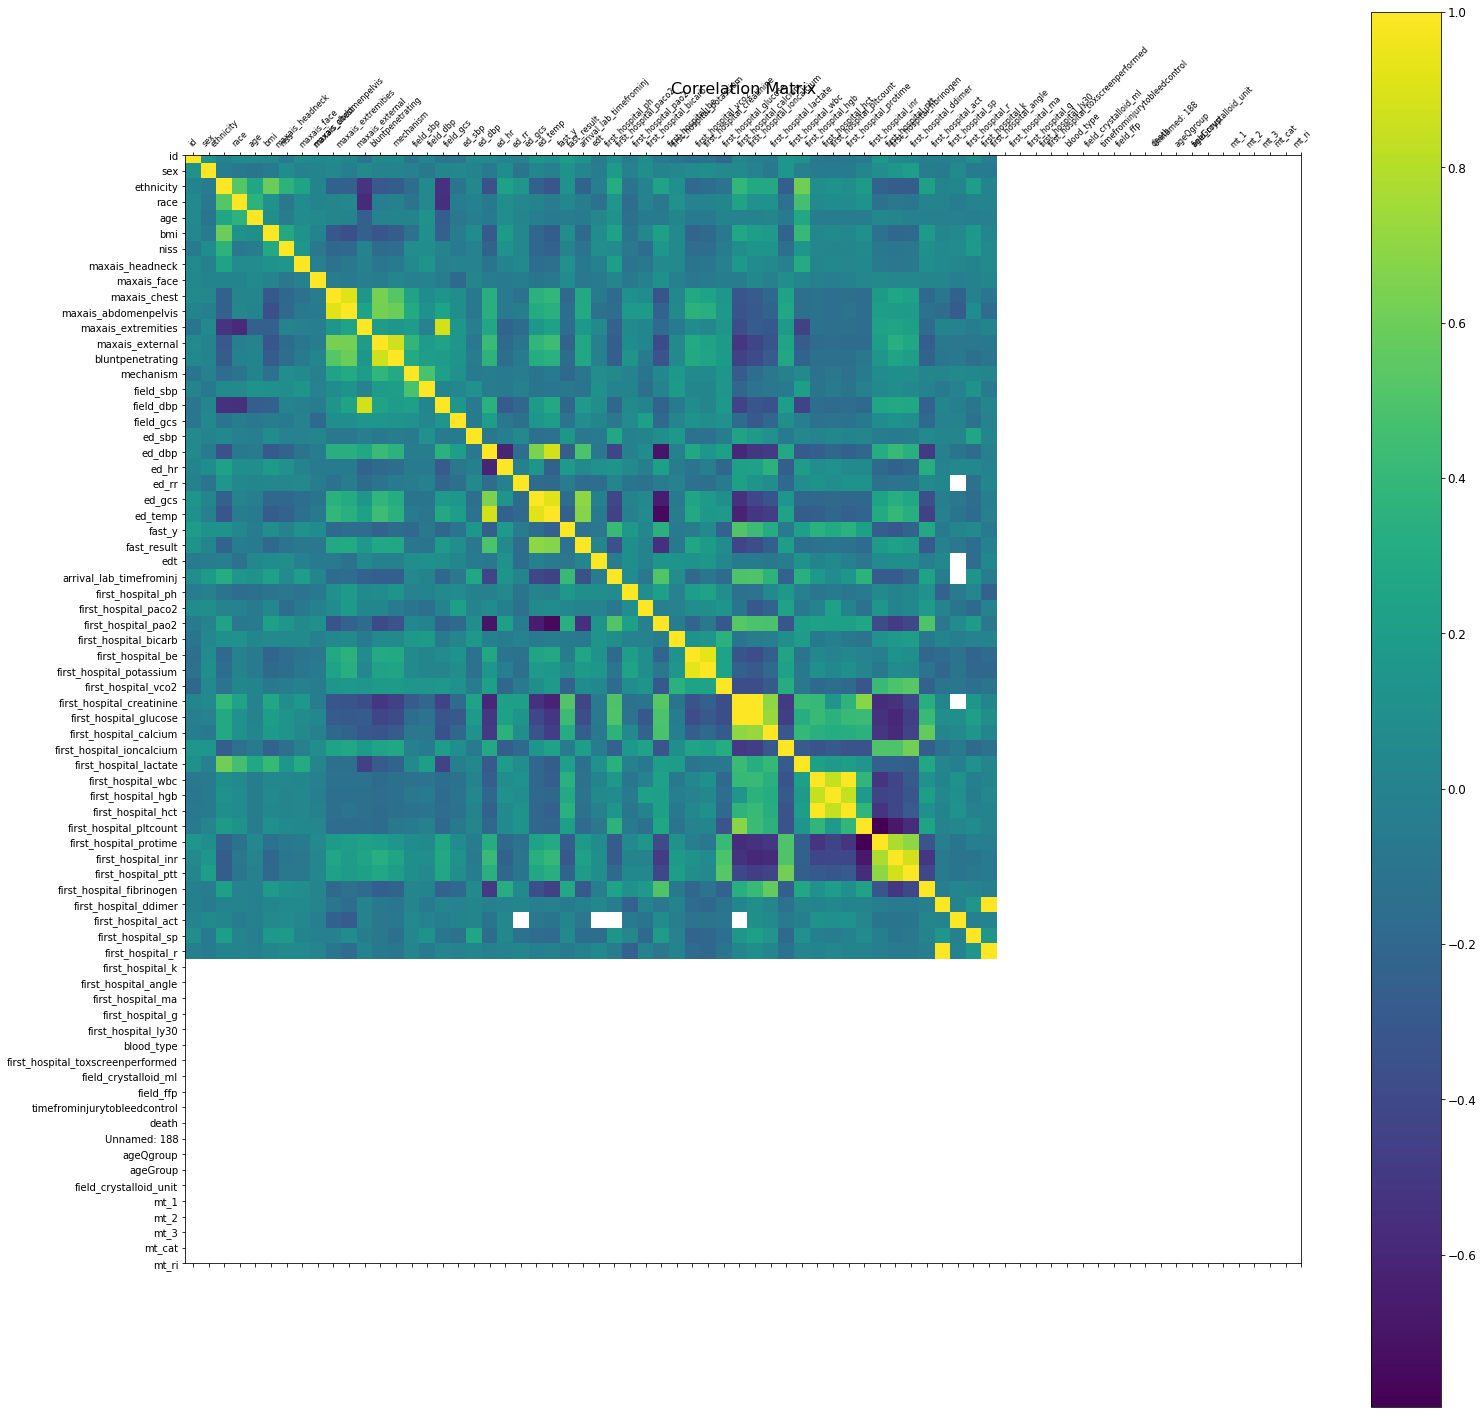

In [47]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(25, 25))
plt.matshow(df1_short.corr(), fignum=f.number)
plt.xticks(range(df1_short.shape[1]), df1_short.columns, fontsize=8, rotation=45)
plt.yticks(range(df1_short.shape[1]), df1_short.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16);

In [48]:
#reading in the Vitals and Labs data (first tab) of .xlsx file and formatting the date containing variables

df2 = pd.read_excel('Trauma_Studies_Master_Data_2019_11_11.xlsx', sheet_name="First 24 Hours Vitals & Labs")

df2.head()

,ID,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,hr24_48_sbp,hr24_48_dbp,hr24_48_hr,hr24_48_gcs,hr24_48_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30,hr24_48_ph,hr24_48_paco2,hr24_48_pao2,hr24_48_bicarb,hr24_48_be,hr24_48_potassium,hr24_48_vco2,hr24_48_creatinine,hr24_48_glucose,hr24_48_calcium,hr24_48_ioncalcium,hr24_48_lactate,hr24_48_wbc,hr24_48_hgb,hr24_48_hct,hr24_48_pltcount,hr24_48_protime,hr24_48_inr,hr24_48_ptt,hr24_48_fibrinogen,hr24_48_ddimer,hr24_48_act,hr24_48_sp,hr24_48_r,hr24_48_k,hr24_48_angle,hr24_48_ma,hr24_48_g,hr24_48_ly30
0,C-001,72.0,40.0,131.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.17,116.0,55.0,40.0,NaN,6.2,15.0,1.22,126.0,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.0,20.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-002,130.0,90.0,110.0,10.0,36.5,117.0,58.0,87.0,15.0,NaN,111.0,61.0,1

### Exploring Vitals and Labs data
df2 dataset has 1067 observations and 239 features.
Command 'dtypes' breakes down all the features by Pandas data type: all the variables in this dataset are continuous variables (float64). Command 'describe' shows basic distribution of all features to help with identifying data outliers and errors.

In [49]:
#describing the second .xlsx file "Labs and Vitals"
# df2.shape

# df2.index

# df2.columns

# df2.info()

# df2.dtypes

df2.describe()

,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,hr24_48_sbp,hr24_48_dbp,hr24_48_hr,hr24_48_gcs,hr24_48_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30,hr24_48_ph,hr24_48_paco2,hr24_48_pao2,hr24_48_bicarb,hr24_48_be,hr24_48_potassium,hr24_48_vco2,hr24_48_creatinine,hr24_48_glucose,hr24_48_calcium,hr24_48_ioncalcium,hr24_48_lactate,hr24_48_wbc,hr24_48_hgb,hr24_48_hct,hr24_48_pltcount,hr24_48_protime,hr24_48_inr,hr24_48_ptt,hr24_48_fibrinogen,hr24_48_ddimer,hr24_48_act,hr24_48_sp,hr24_48_r,hr24_48_k,hr24_48_angle,hr24_48_ma,hr24_48_g,hr24_48_ly30
count,997.000000,425.000000,1003.000000,957.000000,522.000000,951.000000,406.000000,956.000000,571.000000,403.000000,974.000000,420.000000,977.000000,567.000000,515.000000,919.000000,392.000000,925.000000,556.000000,530.000000,925.000000,396.000000,927.000000,740.000000,690.000000,876.000000,377.000000,876.000000,774.000000,732.000000,808.000000,347.000000,810.000000,736.00000,715.000000,542.000000,546.000000,338.000000,545.000000,543.000000,811.000000,797.000000,343.000000,325.0000,794.000000,114.000000,238.000000,815.000000,855.000000,844.000000,841.000000,240.000000,827.000000,815.000000,321.000000,288.000000,691.000000,691.000000,691.000000,685.000000,691.000000,691.000000,691.000000,690.000000,383.000000,383.000000,210.000000,383.000000,384.000000,235.000000,159.000000,59.000000,72.000000,161.000000,224.000000,273.000000,174.000000,402.000000,382.000000,372.000000,52.000000,234.000000,224.000000,148.000000,109.000000,311.000000,311.000000,311.000000,306.000000,311.000000,311.000000,311.000000,311.000000,401.000000,401.000000,228.000000,3

In [50]:
#dropping columns we don't need for further analysis (either have high percentage of missing data or don't have predictive value for our purposes)

df2_short = df2.drop(['hr24_48_sbp', 'hr24_48_dbp', 'hr24_48_hr', 'hr24_48_gcs', 'hr24_48_temp', 'hr24_48_ph', 
                      'hr24_48_paco2', 'hr24_48_pao2', 'hr24_48_bicarb', 'hr24_48_be', 'hr24_48_potassium', 
                      'hr24_48_vco2', 'hr24_48_creatinine', 'hr24_48_glucose', 'hr24_48_calcium', 'hr24_48_ioncalcium', 'hr24_48_lactate', 'hr24_48_wbc', 'hr24_48_hgb', 
                      'hr24_48_hct', 'hr24_48_pltcount', 'hr24_48_protime', 'hr24_48_inr', 'hr24_48_ptt', 
                      'hr24_48_fibrinogen', 'hr24_48_ddimer', 'hr24_48_act', 'hr24_48_sp', 'hr24_48_r', 'hr24_48_k', 
                      'hr24_48_angle', 'hr24_48_ma', 'hr24_48_g', 'hr24_48_ly30'], axis=1)
#df1_short = df.drop(df1.columns[0], axis =1)
df2_short.columns

Index(['ID', 'ed_hr1_sbp', 'ed_hr1_dbp', 'ed_hr1_hr', 'ed_hr1_gcs', 'ed_hr1_temp', 'hr1_2_sbp', 'hr1_2_dbp', 'hr1_2_hr', 'hr1_2_gcs',
       ...
       'hr12_24_fibrinogen', 'hr12_24_ddimer', 'hr12_24_act', 'hr12_24_sp', 'hr12_24_r', 'hr12_24_k', 'hr12_24_angle', 'hr12_24_ma', 'hr12_24_g', 'hr12_24_ly30'], dtype='object', length=205)

In [51]:
#renaming feature 'ID' to 'id' to be consistent between datasets
df2_short.rename(columns = {'ID':'id'}, inplace = True) 
   
# After renaming the columns 
print("\nAfter modifying first column:\n", df2_short.columns) 


After modifying first column:
 Index(['id', 'ed_hr1_sbp', 'ed_hr1_dbp', 'ed_hr1_hr', 'ed_hr1_gcs', 'ed_hr1_temp', 'hr1_2_sbp', 'hr1_2_dbp', 'hr1_2_hr', 'hr1_2_gcs',
       ...
       'hr12_24_fibrinogen', 'hr12_24_ddimer', 'hr12_24_act', 'hr12_24_sp', 'hr12_24_r', 'hr12_24_k', 'hr12_24_angle', 'hr12_24_ma', 'hr12_24_g', 'hr12_24_ly30'], dtype='object', length=205)


In [52]:
# df2_short.shape

# df2_short.info()

# df2_short.dtypes

df2_short.describe()

,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30
count,997.000000,425.000000,1003.000000,957.000000,522.000000,951.000000,406.000000,956.000000,571.000000,403.000000,974.000000,420.000000,977.000000,567.000000,515.000000,919.000000,392.000000,925.000000,556.000000,530.000000,925.000000,396.000000,927.000000,740.000000,690.000000,876.000000,377.000000,876.000000,774.000000,732.000000,542.000000,546.000000,338.000000,545.000000,543.000000,811.000000,797.000000,343.000000,325.0000,794.000000,114.000000,238.000000,815.000000,855.000000,844.000000,841.000000,240.000000,827.000000,815.000000,321.000000,288.000000,691.000000,691.000000,691.000000,685.000000,691.000000,691.000000,691.000000,690.000000,383.000000,383.000000,210.000000,383.000000,384.000000,235.000000,159.000000,59.000000,72.000000,161.000000,224.000000,273.000000,174.000000,402.000000,382.000000,372.000000,52.000000,234.000000,224.000000,148.000000,109.000000,311.000000,311.000000,311.000000,306.000000,311.000000,311.000000,311.000000,311.000000,401.000000,401.000000,228.000000,399.000000,398.000000,312.000000,241.000000,87.000000,96.000000,242.000000,308.000000,352.000000,318.000000,477.000000,479.000000,458.000000,37.000000,213.000000,197.000000,116.00000,83.000000,279.000000,279.000000,279.000000,276.000000,279.000000,279.000000,279.000000,277.000000,278.000000,278.000000,162.000000,278.000000,278.000000,282.000000,265.000000,94.000000,96.000000,265.000000,187.000000,249.000000,379.000000,437.000000,434.000000,428.000000,25.000000,172.000000,156.000000,88.000000,71.000000,185.000

### Exploring Vitals and Labs data
df2_short dataset has 1067 observations and 205 features. Most of the features are of 'float' datatype.

In [55]:
# check number & percentage of missing values in the columns

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

#missing_zero_values_table(df2_short)

### Most of the features above are not trully missing. In most of these cases the results of the test are recorded in the respective time bin based on the time the test was performed. Many of these tests can be ordered as often as couple of times in any given hour or as rare as once during whole hospital stay. The downside of eliminating the features with high percentage of missing values is that we'll be missing most of the lab values ordered on critically sick trauma patients. The downside of combining the time bins into larger groups (ex.: combining four bins, arrival to hour 1, hour1 - hour2, hour2 - hour4 and hour4 - hour6, in one bin arrival to hour 6) is that we can loose granularity of data 

In [56]:
#reading in the Research TEG data (third tab) of .xlsx file and formatting the date containing variables

df3 = pd.read_excel('Trauma_Studies_Master_Data_2019_11_11.xlsx', sheet_name="First Research Lab TEG")

df3.head()


,id,Sample_location,timetoteg,cit_rteg_act,cit_rteg_sp,cit_rteg_r,cit_rteg_k,cit_rteg_angle,cit_rteg_ma,cit_rteg_tma,cit_rteg_g,cit_rteg_ly30,cit_rteg_cl30,cit_rteg_ly60,cit_rteg_cl60,cit_rteg_mrtg,cit_rteg_tmrtg,cit_rteg_tg,cit_rteg_mrl,cit_rteg_tmrl,cit_rteg_l,cit_rteg_tpa150_act,cit_rteg_tpa150_sp,cit_rteg_tpa150_r,cit_rteg_tpa150_k,cit_rteg_tpa150_angle,cit_rteg_tpa150_ma,cit_rteg_tpa150_tma,cit_rteg_tpa150_g,cit_rteg_tpa150_ly30,cit_rteg_tpa150_cl30,cit_rteg_tpa150_ly60,cit_rteg_tpa150_cl60,cit_rteg_tpa150_mrtg,cit_rteg_tpa150_tmrtg,cit_rteg_tpa150_tg,cit_rteg_tpa150_mrl,cit_rteg_tpa150_tmrl,cit_rteg_l.1,ck_sp,ck_r,ck_k,ck_angle,ck_ma,ck_tma,ck_g,ck_ly30,ck_cl30,ck_ly60,ck_cl60,ck_mrtg,ck_tmrtg,ck_tg,ck_mrl,ck_tmrl,ck_l,ck_tpa75_sp,ck_tpa75_r,ck_tpa75_k,ck_tpa75_angle,ck_tpa75_ma,ck_tpa75_tma,ck_tpa75_g,ck_tpa75_ly30,ck_tpa75_cl30,ck_tpa75_ly60,ck_tpa75_cl60,ck_tpa75_mrtg,ck_tpa75_tmrtg,ck_tpa75_tg,ck_tpa75_mrl,ck_tpa75_tmrl,ck_tpa75_l,cit_functfib_sp,cit_functfib_r,cit_functfib_angle,cit_functfib_ma,cit_functfib_tma,cit_functfib_ly30,cit_functfib_cl30,cit_functfib_ly60,cit_functfib_cl60,cit_functfib_flev,cit_functfib_txa_sp,cit_functfib_txa_r,cit_functfib_txa_angle,cit_functfib_txa_ma,cit_functfib_txa_tma,cit_functfib_txa_ly30,cit_functfib_txa_cl30,cit_functfib_txa_ly60,cit_functfib_txa_cl60,cit_functfib_txa_flev,cn_sp,cn_r,cn_k,cn_angle,cn_ma,cn_tma,cn_g,cn_ly30,cn_cl30,cn_ly60,cn_cl60,cn_mrtg,cn_tmrtg,cn_tg,cn_mrl,cn_tmrl,cn_l,cn_tpa75_sp,cn_tpa75_r,cn_tpa75_k,cn_tpa75_angle,cn_tpa75_ma,cn_tpa75_tma,cn_tpa75_g,cn_tpa75_ly30,cn_tpa75_cl30,cn_tpa75_ly60,cn_tpa75_cl60,cn_tpa75_mrtg,cn_tpa75_tmrtg,cn_tpa75_tg,cn_tpa75_mrl,cn_tpa75_tmrl,cn_tpa75_l,cn_tpa150_sp,cn_tpa150_r,cn_tpa150_k,cn_tpa150_angle,cn_tpa150_ma,cn_tpa150_tma,cn_tpa150_g,cn_tpa150_ly30,cn_tpa150_cl30,cn_tpa150_ly60,cn_tpa150_cl60,cn_tpa150_mrtg,cn_tpa150_tmrtg,cn_tpa150_tg,cn_tpa150_mrl,cn_tpa150_tmrl,cn_tpa150_l,platmap_ma_fib,platmapma_adp,platmap_pct_adp_inh
0,C-001,ED,0.83,128.0,0.6,0.8,2.6,61.0,41.5,14.2,3.5,75.7,0.3,88.1,0.3,7.85,2.08,495.27,5.29,23.00,496.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.3,48.4,12.0,22.6,50.9,2.0,77.0,1.0,219.0,1.3,1.7,38.5,12.5,28.3,0.0,100.0,0.0,100.0,228.1,6.8,7.2,2.5,59.9,35.0,15.6,2.7,72.8,0.8,86.4,0.7,8.31,8.33,419.42,3.30,23.92,417.27,6.8,7.4,3.2,54.8,20.6,11.1,1.3,91.5,0.6,95.5,0.6,7.52,8.58,245.56,4.24,13.75,245.56,6.8,7.3,NaN,54.7,15.5,9.9,0.9,94.5,0.8,96.9,0.8,7.26,8.17,183.02,4.93,11.83,183.02,NaN,NaN,NaN
1,C-002,Field,1.50,128.0,0.6,0.8,1.6,69.9,61.0,18.0,7.8,2.8,95.0,5.6,89.3,11.69,2.17,729.10,0.31,25.67,116.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,1.2,67.5,23.0,19.4,0.0,100.0,0.0,100.0,419.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,9.6,3.2,51.6,58.0,28.2,6.9,0.0,100.0,0.0,100.0,6.72,12.00,754.21,NaN,NaN,NaN,9.3,10.5,4.4,41.6,48.0,43.9,4.6,2.3,90.6,12.1,66.6,4.42,13.00,577.51,0.18,49.17,280.36,7.1,8.1,2.5,55.2,42.0,21.4,3.6,39.2,21.0,67.2,5.4,8.16,9.75,507.32,2.07,40.50,497.59,NaN,NaN,NaN
2,C-003,Field,1.53,128.0,0.6,0.8,1.8,66.8,54.5,18.2,6.0,3.9,91.5,8.8,83.6,10.56,2.25,651.90,0.20,26.83,132.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-004,Field,1.08,128.0,0.7,0.8,1.9,67.5,57.5,17.1,6.8,4.0,91.7,8.3,85.6,9.

In [57]:
# df3.shape

# df3.info()

# df3.dtypes

# df3.describe()

### Exploring Research TEG data
df3 dataset has 1067 observations and 147 features.
Command 'dtypes' breakes down all the features by Pandas data type: most of the variables in this dataset are continuous variables (float64) and some are objects. Command 'describe' shows basic distribution of all features to help with identifying data outliers and errors.

In [58]:
#converting data type of feature 'Sample_location' from 'object' to 'categorical'

to_convert = ['Sample_location']; 
df3[to_convert] = df3[to_convert].astype('category')

In [59]:
#dropping columns we don't need for further analysis (either have high percentage of missing data or don't have predictive value for our purposes)

df3_short = df3.drop(['cit_rteg_tpa150_act', 'cit_rteg_tpa150_sp', 'cit_rteg_tpa150_r', 'cit_rteg_tpa150_k', 
                      'cit_rteg_tpa150_angle', 'cit_rteg_tpa150_ma', 'cit_rteg_tpa150_tma', 'cit_rteg_tpa150_g', 
                      'cit_rteg_tpa150_ly30', 'cit_rteg_tpa150_cl30', 'cit_rteg_tpa150_ly60', 'cit_rteg_tpa150_cl60', 
                      'cit_rteg_tpa150_mrtg', 'cit_rteg_tpa150_tmrtg', 'cit_rteg_tpa150_tg', 'cit_rteg_tpa150_mrl', 
                      'cit_rteg_tpa150_tmrl', 'cit_rteg_l', 'cit_functfib_txa_sp', 'cit_functfib_txa_r', 
                      'cit_functfib_txa_angle', 'cit_functfib_txa_ma', 'cit_functfib_txa_tma', 'cit_functfib_txa_ly30',
                      'cit_functfib_txa_cl30', 'cit_functfib_txa_flev', 'cit_functfib_txa_ly60', 'cit_functfib_txa_cl60',
                      'platmap_ma_fib', 'platmapma_adp', 'platmap_pct_adp_inh', 'cit_rteg_l.1'], axis=1)
#df1_short = df.drop(df1.columns[0], axis =1)
df3_short.columns

Index(['id', 'Sample_location', 'timetoteg', 'cit_rteg_act', 'cit_rteg_sp', 'cit_rteg_r', 'cit_rteg_k', 'cit_rteg_angle', 'cit_rteg_ma', 'cit_rteg_tma',
       ...
       'cn_tpa150_ly30', 'cn_tpa150_cl30', 'cn_tpa150_ly60', 'cn_tpa150_cl60', 'cn_tpa150_mrtg', 'cn_tpa150_tmrtg', 'cn_tpa150_tg', 'cn_tpa150_mrl', 'cn_tpa150_tmrl', 'cn_tpa150_l'], dtype='object', length=115)

In [60]:
#check number & percentage of missing values in the columns

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df3_short)

Your selected dataframe has 115 columns and 1067 Rows.
There are 114 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
ck_tpa75_tmrl,0,293,27.5,293,27.5,object
ck_tpa75_mrl,0,293,27.5,293,27.5,object
ck_tpa75_l,0,291,27.3,291,27.3,object
ck_tpa75_k,0,291,27.3,291,27.3,object
ck_tpa75_ly60,7,275,25.8,282,26.4,object
ck_tpa75_cl60,0,275,25.8,275,25.8,object
ck_tpa75_ly30,17,272,25.5,289,27.1,object
ck_tpa75_ma,0,272,25.5,272,25.5,object
ck_tpa75_tma,0,272,25.5,272,25.5,object
ck_tpa75_g,0,272,25.5,272,25.5,object


### Checking for duplicate rows with feature 'id' before merging the datasets

In [61]:
#checking for duplicate rows in df1_short

boolean = any(df1_short.duplicated(subset=['id']))
print(boolean, end='\n\n') 

False



In [62]:
#checking for duplicate rows in df2_short

boolean = any(df2_short.duplicated(subset=['id']))
print(boolean, end='\n\n') 

False



In [63]:
#checking for duplicate rows in df3_short

boolean = any(df3_short.duplicated(subset=['id']))
print(boolean, end='\n\n') 

False



### Merging all three datasets in one by feature 'id'


In [64]:
#Merging df1_short and df2_short by patient ID. Only the patient IDs present in all three dataframes will be merged ("inner" merge)

df_merged1and2 = pd.merge(df1_short, df2_short, how = 'left', on = 'id')

df_merged1and2.head()

,id,sex,ethnicity,race,age,bmi,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_toxscreenperformed,field_crystalloid_ml,field_ffp,timefrominjurytobleedcontrol,death,Unnamed: 188,ageQgroup,ageGroup,field_crystalloid_unit,mt_1,mt_2,mt_3,mt_cat,mt_ri,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,23.4,50,5,1,3,2,0,1,Blunt,Motorcycle Crash,0.0,NaN,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,250,0,0.78,Y,NaN,young,18-24,0.250,no,no,no,yes,yes,72.0,40.0,131.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [65]:
#checking the size of merged datasets 1 and 2
df_merged1and2.shape


(1067, 276)

In [66]:
#merging df_merged1and2 and df3_short by patient ID. Only the patient IDs present in all three dataframes will be merged ("inner" merge)

df_merged = pd.merge(df_merged1and2, df3_short, how = 'left', on = 'id')

#df_merged.head()

#df_merged.to_csv('df_merged.csv')

df_merged.shape

(1067, 390)

In [67]:
df1_short.head(5)

,id,sex,ethnicity,race,age,bmi,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_toxscreenperformed,field_crystalloid_ml,field_ffp,timefrominjurytobleedcontrol,death,Unnamed: 188,ageQgroup,ageGroup,field_crystalloid_unit,mt_1,mt_2,mt_3,mt_cat,mt_ri
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,23.4,50,5,1,3,2,0,1,Blunt,Motorcycle Crash,0.0,NaN,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,250,0,0.78,Y,NaN,young,18-24,0.250,no,no,no,yes,yes
1,C-002,M,Not_Hispanic_or_Latino,Black_or_African_American,26.0,23.4,1,0,0,0,0,0,0,Penetrating,Stab Wound,60.0,40.0,8.0,130,90.0,110,16.0,10.0,36.5,N,NaN,N,0.67,7.31,42.0,NaN,21.0,4.8,4.1,23.0,NaN,NaN,8.3,NaN,2.4,8.3,11.7,38.4,125.0,NaN,1.23,28.6,324.00,0.269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,250,2,0.67,N,NaN,young,25-34,0.250,no,no,no,no,no
2,C-003,M,Not_Hispanic_or_Latino,White,34.0,22.6,3,0,0,0,0,1,1,Penetrating,Stab Wound,60.0,NaN,15.0,126,78.0,82,20.0,15.0,36.5,N,NaN,N,1.25,7.30,40.0,NaN,19.0,-7.0,3.1,24.0,NaN,NaN,7.5,NaN,2.1,11.2,16.1,48.5,290.0,NaN,1.00,22.1,249.00,0.269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,100,0,1.55,N,NaN,middleage,25-34,0.100,no,no,no,no,no
3,C-004,M,Not_Hispanic_or_Latino,Black_or_African_American,19.0,20.5,4,2,0,0,0,0,0,Blunt,MVC - Occupant,76.0,62.0,7.0,100,60.0,69,14.0,9.0,35.8,Y,Negative,N,0.43,7.41,37.0,NaN,23.0,-1.0,3.4,27.0,NaN,NaN,9.2,0.94,2.6,9.5,14.6,44.8,310.0,NaN,1.06,21.7,222.00,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,375,0,0.42,N,NaN,young,18-24,0.375,no,no,no,no,no
4,10001,M,Hispanic_or_Latino,White,45.8,NaN,1,0,0,0,0,0,1,Penetrating,Gunshot Wound (GSW),132.0,NaN,NaN,140,NaN,86,NaN,15.0,36.7,N,NaN,N,0.17,7.53,23.0,NaN,19.0,-3.0,3.3,20.0,NaN,NaN,10.0,NaN,NaN,8.9,14.6,44.4,191.0,NaN,1.07,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O POS,N,0,0,NaN,N,NaN,old,45-54,0.000,no,no,no,no,no


In [68]:
df_merged.head(10)

,id,sex,ethnicity,race,age,bmi,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_toxscreenperformed,field_crystalloid_ml,field_ffp,timefrominjurytobleedcontrol,death,Unnamed: 188,ageQgroup,ageGroup,field_crystalloid_unit,mt_1,mt_2,mt_3,mt_cat,mt_ri,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30,Sample_location,timetoteg,cit_rteg_act,cit_rteg_sp,cit_rteg_r,cit_rteg_k,cit_rteg_angle,cit_rteg_ma,cit_rteg_tma,cit_rteg_g,cit_rteg_ly30,cit_rteg_cl30,cit_rteg_ly60,cit_rteg_cl60,cit_rteg_mrtg,cit_rteg_tmrtg,cit_rteg_tg,cit_rteg_mrl,cit_rteg_tmrl,ck_sp,ck_r,ck_k,ck_angle,ck_ma,ck_tma,ck_g,ck_ly30,ck_cl30,ck_ly60,ck_cl60,ck_mrtg,ck_tmrtg,ck_tg,ck_mrl,ck_tmrl,ck_l,ck_tpa75_sp,ck_tpa75_r,ck_tpa75_k,ck_tpa75_angle,ck_tpa75_ma,ck_tpa75_tma,ck_t

In [69]:
df_merged['mt_ri'].describe()

count     1067
unique       2
top         no
freq       892
Name: mt_ri, dtype: object

### Comparing contingency tables of various MT definitions by sex: 
 - definition 1 - 123 patients 
 - definition 2 - 173 patients
 - definition 3 - 232 patients
 - definition 4 - unable to calculate based on available data
 - definition 5 - 142 patients              
 - definition 6 - 175 patients

In [70]:
df_merged_crosstab = pd.crosstab(df_merged['mt_1'], df_merged['sex'], margins = False) 
print(df_merged_crosstab)     

sex     F    M
mt_1          
no    182  762
yes    31   92


In [71]:
df_merged_crosstab = pd.crosstab(df_merged['mt_2'], df_merged['sex'], margins = False) 
print(df_merged_crosstab) 

sex     F    M
mt_2          
no    175  719
yes    38  135


In [72]:
df_merged_crosstab = pd.crosstab(df_merged['mt_3'], df_merged['sex'], margins = False) 
print(df_merged_crosstab) 

sex     F    M
mt_3          
no    163  672
yes    50  182


In [73]:
df_merged_crosstab = pd.crosstab(df_merged['mt_cat'], df_merged['sex'], margins = False) 
print(df_merged_crosstab) 

sex       F    M
mt_cat          
no      188  737
yes      25  117


In [74]:
df_merged_crosstab = pd.crosstab(df_merged['mt_ri'], df_merged['sex'], margins = False) 
print(df_merged_crosstab)

sex      F    M
mt_ri          
no     184  708
yes     29  146


In [75]:
df_merged_crosstab = pd.crosstab(df_merged['mt_1'], df_merged['death'], margins = False) 
print(df_merged_crosstab)

death    N    Y
mt_1           
no     839  105
yes     73   50


In [76]:
df_merged_crosstab = pd.crosstab(df_merged['mt_ri'], df_merged['death'], margins = False) 
print(df_merged_crosstab)

death    N   Y
mt_ri         
no     797  95
yes    115  60


In [77]:
#listing all the columns for easy cut-and-paste in the next cell
list(df_merged)

['id',
 'sex',
 'ethnicity',
 'race',
 'age',
 'bmi',
 'niss',
 'maxais_headneck',
 'maxais_face',
 'maxais_chest',
 'maxais_abdomenpelvis',
 'maxais_extremities',
 'maxais_external',
 'bluntpenetrating',
 'mechanism',
 'field_sbp',
 'field_dbp',
 'field_gcs',
 'ed_sbp',
 'ed_dbp',
 'ed_hr',
 'ed_rr',
 'ed_gcs',
 'ed_temp',
 'fast_y',
 'fast_result',
 'edt',
 'arrival_lab_timefrominj',
 'first_hospital_ph',
 'first_hospital_paco2',
 'first_hospital_pao2',
 'first_hospital_bicarb',
 'first_hospital_be',
 'first_hospital_potassium',
 'first_hospital_vco2',
 'first_hospital_creatinine',
 'first_hospital_glucose',
 'first_hospital_calcium',
 'first_hospital_ioncalcium',
 'first_hospital_lactate',
 'first_hospital_wbc',
 'first_hospital_hgb',
 'first_hospital_hct',
 'first_hospital_pltcount',
 'first_hospital_protime',
 'first_hospital_inr',
 'first_hospital_ptt',
 'first_hospital_fibrinogen',
 'first_hospital_ddimer',
 'first_hospital_act',
 'first_hospital_sp',
 'first_hospital_r',
 'firs

In [78]:
#creating a subset of data to limit the available features to 1 hour post-injury for analysis of predictors of MT 
#according to definition #6 (mt_ri) 

df_mt_ri = df_merged.drop([  'timefrominjurytobleedcontrol','death','mt_1',
 'mt_2',
 'mt_3',
 'mt_cat','hr1_2_sbp',
 'hr1_2_dbp',
 'hr1_2_hr',
 'hr1_2_gcs',
 'hr1_2_temp',
 'hr2_4_sbp',
 'hr2_4_dbp',
 'hr2_4_hr',
 'hr2_4_gcs',
 'hr2_4_temp',
 'hr4_6_sbp',
 'hr4_6_dbp',
 'hr4_6_hr',
 'hr4_6_gcs',
 'hr4_6_temp',
 'hr6_12_sbp',
 'hr6_12_dbp',
 'hr6_12_hr',
 'hr6_12_gcs',
 'hr6_12_temp',
 'hr12_24_sbp',
 'hr12_24_dbp',
 'hr12_24_hr',
 'hr12_24_gcs',
 'hr12_24_temp','hr1_2_ph',
 'hr1_2_paco2',
 'hr1_2_pao2',
 'hr1_2_bicarb',
 'hr1_2_be',
 'hr1_2_potassium',
 'hr1_2_vco2',
 'hr1_2_creatinine',
 'hr1_2_glucose',
 'hr1_2_calcium',
 'hr1_2_ioncalcium',
 'hr1_2_lactate',
 'hr1_2_wbc',
 'hr1_2_hgb',
 'hr1_2_hct',
 'hr1_2_pltcount',
 'hr1_2_protime',
 'hr1_2_inr',
 'hr1_2_ptt',
 'hr1_2_fibrinogen',
 'hr1_2_ddimer',
 'hr1_2_act',
 'hr1_2_sp',
 'hr1_2_r',
 'hr1_2_k',
 'hr1_2_angle',
 'hr1_2_ma',
 'hr1_2_g',
 'hr1_2_ly30',
 'hr2_4_ph',
 'hr2_4_paco2',
 'hr2_4_pao2',
 'hr2_4_bicarb',
 'hr2_4_be',
 'hr2_4_potassium',
 'hr2_4_vco2',
 'hr2_4_creatinine',
 'hr2_4_glucose',
 'hr2_4_calcium',
 'hr2_4_ioncalcium',
 'hr2_4_lactate',
 'hr2_4_wbc',
 'hr2_4_hgb',
 'hr2_4_hct',
 'hr2_4_pltcount',
 'hr2_4_protime',
 'hr2_4_inr',
 'hr2_4_ptt',
 'hr2_4_fibrinogen',
 'hr2_4_ddimer',
 'hr2_4_act',
 'hr2_4_sp',
 'hr2_4_r',
 'hr2_4_k',
 'hr2_4_angle',
 'hr2_4_ma',
 'hr2_4_g',
 'hr2_4_ly30',
 'hr4_6_ph',
 'hr4_6_paco2',
 'hr4_6_pao2',
 'hr4_6_bicarb',
 'hr4_6_be',
 'hr4_6_potassium',
 'hr4_6_vco2',
 'hr4_6_creatinine',
 'hr4_6_glucose',
 'hr4_6_calcium',
 'hr4_6_ioncalcium',
 'hr4_6_lactate',
 'hr4_6_wbc',
 'hr4_6_hgb',
 'hr4_6_hct',
 'hr4_6_pltcount',
 'hr4_6_protime',
 'hr4_6_inr',
 'hr4_6_ptt',
 'hr4_6_fibrinogen',
 'hr4_6_ddimer',
 'hr4_6_act',
 'hr4_6_sp',
 'hr4_6_r',
 'hr4_6_k',
 'hr4_6_angle',
 'hr4_6_ma',
 'hr4_6_g',
 'hr4_6_ly30',
 'hr6_12_ph',
 'hr6_12_paco2',
 'hr6_12_pao2',
 'hr6_12_bicarb',
 'hr6_12_be',
 'hr6_12_potassium',
 'hr6_12_vco2',
 'hr6_12_creatinine',
 'hr6_12_glucose',
 'hr6_12_calcium',
 'hr6_12_ioncalcium',
 'hr6_12_lactate',
 'hr6_12_wbc',
 'hr6_12_hgb',
 'hr6_12_hct',
 'hr6_12_pltcount',
 'hr6_12_protime',
 'hr6_12_inr',
 'hr6_12_ptt',
 'hr6_12_fibrinogen',
 'hr6_12_ddimer',
 'hr6_12_act',
 'hr6_12_sp',
 'hr6_12_r',
 'hr6_12_k',
 'hr6_12_angle',
 'hr6_12_ma',
 'hr6_12_g',
 'hr6_12_ly30',
 'hr12_24_ph',
 'hr12_24_paco2',
 'hr12_24_pao2',
 'hr12_24_bicarb',
 'hr12_24_be',
 'hr12_24_potassium',
 'hr12_24_vco2',
 'hr12_24_creatinine',
 'hr12_24_glucose',
 'hr12_24_calcium',
 'hr12_24_ioncalcium',
 'hr12_24_lactate',
 'hr12_24_wbc',
 'hr12_24_hgb',
 'hr12_24_hct',
 'hr12_24_pltcount',
 'hr12_24_protime',
 'hr12_24_inr',
 'hr12_24_ptt',
 'hr12_24_fibrinogen',
 'hr12_24_ddimer',
 'hr12_24_act',
 'hr12_24_sp',
 'hr12_24_r',
 'hr12_24_k',
 'hr12_24_angle',
 'hr12_24_ma',
 'hr12_24_g',
 'hr12_24_ly30',
 'Sample_location',
 'ck_sp',                                       
 'ck_r',                                         
 'ck_k',                                         
 'ck_angle',                                     
 'ck_ma',                                        
 'ck_tma',                                       
 'ck_g',                                        
 'ck_ly30',                                      
 'ck_cl30',                                      
 'ck_ly60',                                      
 'ck_cl60',                                      
 'ck_mrtg',                                      
 'ck_tmrtg',                                     
 'ck_tg',                                        
 'ck_mrl',                                       
 'ck_tmrl',                                      
 'ck_l',                                         
 'ck_tpa75_sp',                                  
 'ck_tpa75_r',                                   
 'ck_tpa75_k',                                   
 'ck_tpa75_angle',                               
 'ck_tpa75_ma',                                  
 'ck_tpa75_tma',                                 
 'ck_tpa75_g',                                   
 'ck_tpa75_ly30',                                
 'ck_tpa75_cl30',                                
 'ck_tpa75_ly60',                                
 'ck_tpa75_cl60',                                
 'ck_tpa75_mrtg',                                
 'ck_tpa75_tmrtg',                               
 'ck_tpa75_tg',                                  
 'ck_tpa75_mrl',                                 
 'ck_tpa75_tmrl',                           
 'ck_tpa75_l',
 'first_hospital_toxscreenperformed',
 'cit_rteg_sp',
 'cit_rteg_r',
 'clinicallab_datetime',
 'bleedingcontrol_datetime',
 'death_datetime'], axis=1)

#df1_short = df.drop(df1.columns[0], axis =1)

df_mt_ri.columns

KeyError: "['clinicallab_datetime' 'bleedingcontrol_datetime' 'death_datetime'] not found in axis"

In [ ]:
#after cutting down to features limited to pre-hospital care and first first hour of hospital care
df_mt_ri.shape

In [ ]:
#exploring the pattern of missing data

import missingno as msno

missingdata_df_mt_ri = df_mt_ri.columns[df_mt_ri.isnull().any()].tolist()
msno.matrix(df_mt_ri[missingdata_df_mt_ri])

In [ ]:
#the missingno bar chart is a visualization of the data nullity; the data on the y-axis is log transformed 
#to better visualize features with very large missing values

msno.bar(df_mt_ri[missingdata_df_mt_ri], color="blue", log=True, figsize=(30,18))

#### Finally, a simple correlation heatmap is shown below. This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1). Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed. Also, a perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.

In [ ]:
#heatmap of missing data only

msno.heatmap(df_mt_ri[missingdata_df_mt_ri], figsize=(20,20))


## Normality check. The following formal tests are used to assess the data normality: Shapiro-Wilk, Anderson-Darling and D’Agostino’s K^2. 

In [ ]:
#Creating a subset of data with continuous variables only 

df_mt_ri_contonly = df_mt_ri.drop(['id', 'sex', 'edt', 'bluntpenetrating', 'fast_y', 'ethnicity', 'race',
                                   'fast_result', 'blood_type', 'ageGroup', 'mechanism', 'ageQgroup', 'mt_ri'], axis=1)

#list(df_mt_ri_contonly)
df_mt_ri_contonly.head(10)


In [ ]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

In [ ]:
#Shapiro-Wilk

# normality test
stat, p = shapiro(df_mt_ri_contonly['first_hospital_potassium'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
#Anderson-Darling

# normality test
result = anderson(df_mt_ri_contonly)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [ ]:
#D'Agostino's K^2

# normality test
stat, p = normaltest(df_mt_ri_contonly)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

## Pre-processing merged data with IterativeImputer with Multivariate Imputation by Chained Equations (MICE)

#### IterativeImputer models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [ ]:
#here I am using missing data imputation package called FancyImputer (assumes Gaussian distribution - needs to be transformed to normal; also, should be applied to train set only not on entire dataset)

from fancyimpute import IterativeImputer as MICE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

#imputed_df_mt_ri = fancyimpute.MICE().fit_transform(df_mt_ri)
#MICE().fit_transform(df)

In [ ]:
#trying LabelEncoder to convert a string into incremental values - IT WORKED!!! - not sure if I need this

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df_mt_ri.columns:
    if df_mt_ri[column_name].dtype == object:
        df_mt_ri[column_name] = pd.to_numeric(df_mt_ri[column_name], errors='coerce')
    
df_mt_ri.dtypes

In [ ]:
y = df_mt_ri['mt_ri']
X = df_mt_ri.drop('mt_ri', axis=1)


categorical_features = ['sex', 'edt', 'bluntpenetrating', 'fast_y', 'ethnicity', 'race',
                        'fast_result', 'blood_type', 'ageGroup', 'mechanism', 'ageQgroup']

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = list(set(X.columns)-set(categorical_features))

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median'))])

# preprocessor = ColumnTransformer(
#     transformers=[ 
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

In [ ]:
# comparing iterative imputer with mean and median strategies

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = df_mt_ri()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

# # Estimate the score after iterative imputation of the missing values
# # with different estimators
# estimators = [
#     BayesianRidge(),
#     DecisionTreeRegressor(max_features='sqrt', random_state=0),
#     ExtraTreesRegressor(n_estimators=10, random_state=0),
#     KNeighborsRegressor(n_neighbors=15)
# ]
# score_iterative_imputer = pd.DataFrame()
# for impute_estimator in estimators:
#     estimator = make_pipeline(
#         IterativeImputer(random_state=0, estimator=impute_estimator),
#         br_estimator
#     )
#     score_iterative_imputer[impute_estimator.__class__.__name__] = \
#         cross_val_score(
#             estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
#             cv=N_SPLITS
#         )

# scores = pd.concat(
#     [score_full_data, score_simple_imputer, score_iterative_imputer],
#     keys=['Original', 'SimpleImputer', 'IterativeImputer'], axis=1
# )

# # plot boston results
# fig, ax = plt.subplots(figsize=(13, 6))
# means = -scores.mean()
# errors = scores.std()
# means.plot.barh(xerr=errors, ax=ax)
# ax.set_title('California Housing Regression with Different Imputation Methods')
# ax.set_xlabel('MSE (smaller is better)')
# ax.set_yticks(np.arange(means.shape[0]))
# ax.set_yticklabels([" w/ ".join(label) for label in means.index.get_values()])
# plt.tight_layout(pad=1)
# plt.show()

In [ ]:
if 5 == 15/3:
    print ("Jambo!")

In [ ]:
def equals_to_zero(y):
    if y < 0:
        return "Negative"
    elif y > 0:
        return "Positive"
    else:
        return "Equal"

In [ ]:
print (equals_to_zero(-8))

In [ ]:
print (equals_to_zero(999))

###### print (equals_to_zero(0))

## Pre-processing merged data with SimpleImputer(strategy='constant') and class_weight=None

In [ ]:
#importing experimental features from sklearn to treat the missing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa

# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [ ]:
#trying LabelEncoder once more to convert a string into incremental values - IT WORKED!!!

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df_mt_ri.columns:
    if df_mt_ri[column_name].dtype == object:
        df_mt_ri[column_name] = pd.to_numeric(df_mt_ri[column_name], errors='coerce')
    
df_mt_ri.dtypes

In [ ]:
#using SimpleImputer to impute missing values and OneHotEncoder to break down categorical features

y = df_mt_ri['mt_ri']
X = df_mt_ri.drop('mt_ri', axis=1)


categorical_features = ['sex', 'edt', 'bluntpenetrating', 'fast_y', 'ethnicity', 'race',
                        'fast_result', 'blood_type', 'ageGroup', 'mechanism', 'ageQgroup']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = list(set(X.columns)-set(categorical_features))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
preprocessor.fit(X)

In [ ]:
df_mt_ri_withdummies = pd.get_dummies(df_mt_ri)
df_mt_ri_withdummies

In [ ]:
#df_mt_ri_withdummies.info()

In [ ]:
#you can explicitly get transformed (preprocessed) X

Xt = preprocessor.transform(X)

In [ ]:
#due to expanded categorical features we now have more features

print(X.shape)
print(Xt.shape)

In [ ]:
#pulling the names of the categorical features by

new_cat_features=preprocessor.transformers_[1][1]['onehot'].get_feature_names(categorical_features)
new_cat_features

### Splitting the dataset into training and test sets

In [ ]:
#splitting the dataset into training and test sets

Xt_train, Xt_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=55)

In [ ]:
#Train and Test dataset size details

print ("Xt_train shape is: ", Xt_train.shape)
print ("y_train shape is: ", y_train.shape)

print ("Xt_test shape is: ", Xt_test.shape)
print ("y_test shape is: ", y_test.shape)

In [ ]:
#training the classifier on a Random Forest, SVC and Logistic Regression models

rf = RandomForestClassifier()
rf.fit(Xt_train, y_train)

In [ ]:
#training the classifier on SVC model with linear kernel

svc_w_linear_kernel = SVC(kernel='linear')
svc_w_linear_kernel.fit(Xt_train, y_train)

In [ ]:
#training the classifier on SVC model without linear kernel

svc_wo_linear_kernel = SVC()
svc_wo_linear_kernel.fit(Xt_train, y_train)

### Tesing the model yields Train Accuracy of 100% and Test Accuracy of 87%

In [ ]:
#testing the model on the test set
from sklearn.metrics import accuracy_score
   
#then fitting the model on the test set
rf = RandomForestClassifier()
rf.fit(Xt_train, y_train)
    
print ("Trained model :: ", rf)
predictions = rf.predict(Xt_test)

# Train and Test Accuracy
print("Train Accuracy :: ", accuracy_score(y_train, rf.predict(Xt_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

### From the above code, we are printing the first 15 values of y_test and the predict results target. Seems like the trained classifier correctly predicted the first 13 target classes.

In [ ]:
for i in range(0, 15):
        print ("Actual outcome :: {} and Predicted outcome ::{}".format(list(y_test)[i], predictions[i]))

### Assesing confusion matrix

In [ ]:
#assessing the confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
#from sklearn.metrics import ConfusionMatrixDisplay


print ("Confusion matrix\n", confusion_matrix(y_test, predictions))


In [ ]:
#Visualising Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
cv_pred = cross_val_predict(rf, Xt, y)
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y, cv_pred, normalize=True)

#matplotlib.axes._subplots.AxesSubplot object at 0x7fe967d64490

plt.show()

## Pre-processing merged data with SimpleImputer(strategy='constant') and class_weight="balanced"and trying some other metrics

In [ ]:
#

from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature


In [ ]:
y1 = df_mt_ri['mt_ri']
X1 = df_mt_ri.drop('mt_ri', axis=1)

In [ ]:
categorical_features = ['sex', 'edt', 'bluntpenetrating', 'fast_y', 'ethnicity', 'race',
                        'fast_result', 'blood_type', 'ageGroup', 'mechanism', 'ageQgroup']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = list(set(X.columns)-set(categorical_features))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
preprocessor.fit(X1)

In [ ]:
X1t = preprocessor.transform(X1)

In [ ]:
print(X1.shape)
print(X1t.shape)

In [ ]:
new_cat_features=preprocessor.transformers_[1][1]['onehot'].get_feature_names(categorical_features)
new_cat_features

In [ ]:
X1t_train, X1t_test, y1_train, y1_test = train_test_split(X1t, y1, test_size=0.25, random_state=55)

In [ ]:
print ("X1t_train shape is: ", X1t_train.shape)
print ("y1_train shape is: ", y1_train.shape)

print ("X1t_test shape is: ", X1t_test.shape)
print ("y1_test shape is: ", y1_test.shape)

In [ ]:
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X1t_train, y1_train)

In [ ]:
#obtaining a list of probabilities which represent the likelihood that a sample falls under a given category

probs = rf.predict_proba(X1t_test)

In [ ]:
#taking the predicted probability that mt_ri = 1

mt_ri_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y1_test, mt_ri_probs, pos_label='yes')
roc_auc = auc(fpr, tpr)

In [ ]:
#y1_test

In [ ]:
#a point in top left corner gives us the best trade-off between sensitivity and specificity

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y1', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
#using our model to categorize the data based off the probabilities from the previous step

y1_pred = rf.predict(X1t_test)

In [ ]:
#precision measures true positives over true positives plus false positives: Precision = TP/(TP+FP)

precision_score(y1_test, y1_pred, pos_label='yes')

In [ ]:
#recall measures true positives over true positives plus false negatives: 
#Recall/Sensitivity/True Positive Rate  = TP/(TP+FN)

recall_score(y1_test, y1_pred, pos_label='yes')

In [ ]:
#the F1 score combines precision and recall using the harmonic mean (2xy/(x+y) vs. arithmetic mean (x+y)/2)

f1_score(y1_test, y1_pred, pos_label='yes')

In [ ]:
# #selecting the number of thresholds which correspond to the top right corner will result in the best combination 
# #of precision and recall

# precision, recall, threshold = precision_recall_curve(y1_test, y1_pred, pos_label='yes')
# average_precision = average_precision_score(y1_test, y1_pred, pos_label='yes')
# step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
# plt.step(recall, precision, color='r', alpha=0.2, where='post')
# plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.0])
# plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


## Parameter tuning

In [ ]:
# #finding the optimal number of trees (n-estimators)

# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
# train_results = []
# test_results = []

# for estimator in n_estimators:
#    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
#    rf.fit(X1t_train, y_train)
#    train_pred = rf.predict(X1t_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label='yes')
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(X1t_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label='yes')
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
    
# from matplotlib.legend_handler import HandlerLine2D

# line1, = plt.plot(n_estimators, train_results, "b", label='Train AUC')
# line2, = plt.plot(n_estimators, test_results, "r", label='Test AUC')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel("AUC score")
# plt.xlabel("n_estimators")
# plt.show()

In [ ]:
# #finding the optimal depth of tree

# max_depths = np.linspace(1, 32, 32, endpoint=True)
# train_results = []
# test_results = []

# for max_depth in max_depths:
#    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
#    rf.fit(X1t_train, y_train)
#    train_pred = rf.predict(X1t_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label='yes')
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(X1t_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label='yes')
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
    
# from matplotlib.legend_handler import HandlerLine2D

# line1, = plt.plot(max_depths, train_results, ‘b’, label=”Train AUC”)
# line2, = plt.plot(max_depths, test_results, ‘r’, label=”Test AUC”)
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel(‘AUC score’)
# plt.xlabel(‘Tree depth’)
# plt.show()

## Pre-processing merged data with SimpleImputer(strategy='most_frequent') and class_weight="balanced", changing the train/test ratio to 0.8/0.2 and trying some other metrics - this resulted in some decrease in precision and increase in recall and F1 score. 

In [ ]:
#

from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature


In [ ]:
y2 = df_mt_ri['mt_ri']
X2 = df_mt_ri.drop('mt_ri', axis=1)


In [ ]:
categorical_features = ['sex', 'edt', 'bluntpenetrating', 'fast_y', 'ethnicity', 'race',
                        'fast_result', 'blood_type', 'ageGroup', 'mechanism', 'ageQgroup']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = list(set(X.columns)-set(categorical_features))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
preprocessor.fit(X2)


In [ ]:
X2t = preprocessor.transform(X2)

In [ ]:
print(X2.shape)
print(X2t.shape)

In [ ]:
new_cat_features=preprocessor.transformers_[1][1]['onehot'].get_feature_names(categorical_features)
new_cat_features


In [ ]:
X2t_train, X2t_test, y2_train, y2_test = train_test_split(X2t, y2, test_size=0.2, random_state=55)


In [ ]:
print ("X2t_train shape is: ", X2t_train.shape)
print ("y2_train shape is: ", y2_train.shape)

print ("X2t_test shape is: ", X2t_test.shape)
print ("y2_test shape is: ", y2_test.shape)


In [ ]:
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X2t_train, y2_train)

In [ ]:
#obtaining a list of probabilities which represent the likelihood that a sample falls under a given category

probs = rf.predict_proba(X2t_test)


In [ ]:
#taking the predicted probability that mt_ri = 1

mt_ri_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y2_test, mt_ri_probs, pos_label='yes')
roc_auc = auc(fpr, tpr)

#y2_test


In [ ]:
#a point in top left corner gives us the best trade-off between sensitivity and specificity

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y2', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
#using our model to categorize the data based off the probabilities from the previous step

y2_pred = rf.predict(X2t_test)

In [ ]:
#precision measures true positives over true positives plus false positives: Precision = TP/(TP+FP)

precision_score(y2_test, y2_pred, pos_label='yes')


In [ ]:
#recall measures true positives over true positives plus false negatives: 
#Recall/Sensitivity/True Positive Rate  = TP/(TP+FN)

recall_score(y2_test, y2_pred, pos_label='yes')


In [ ]:
#the F1 score combines precision and recall using the harmonic mean (2xy/(x+y) vs. arithmetic mean (x+y)/2)

f1_score(y2_test, y2_pred, pos_label='yes')

In [ ]:
# #selecting the number of thresholds which correspond to the top right corner will result in the best combination 
# #of precision and recall

# precision, recall, threshold = precision_recall_curve(y2_test, y2_pred, pos_label='yes')
# average_precision = average_precision_score(y2_test, y2_pred, pos_label='yes')
# step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
# plt.step(recall, precision, color='r', alpha=0.2, where='post')
# plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.0])
# plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

### Now trying to use df_mt_ri_withdummies dataset

In [ ]:
df_mt_ri_withdummies['mt_ri_yes'].unique()


In [ ]:
#visualizing the tree

from sklearn.tree import export_graphviz
import pydotplus
import six
from sklearn import tree
import os

dotfile = six.StringIO()

i_tree = 0
for tree_in_forest in rf.estimators_:
    if (i_tree ==3):        
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        graph = pydotplus.graph_from_dot_data(dotfile.getvalue())        
    i_tree = i_tree + 1
Image(graph.create_png())



In [ ]:
rf.get_params()

In [ ]:
#determining the ranges of hyperparameters 

param_space={
'max_depth' : [7, 9, 11, 13, None],
'min_samples_split' : [2, 3, 5],
'min_samples_leaf' : [1, 2, 3, 5],
'max_features' : [4, 8, None],
'n_estimators' : [100] }

In [ ]:
#running a grid search with cross validation 

from sklearn.model_selection import GridSearchCV
# rf = RandomForestClassifier()
# classifier = RandomForestClassifier(n_estimators=300, random_state=0)
# clf_gs = GridSearchCV(estimator=classifier, param_grid=param_space, cv=5, n_jobs=-1)
clf_gs1 = GridSearchCV(estimator=rf, param_grid=param_space, cv=5, n_jobs=-1)

In [ ]:
#training the model: not dividing into train and test sets because of cross-validation - RUNS LO-OONG TIME

clf_gs1.fit(Xt, y)

In [ ]:
# #calling the best performing estimator

# clf_gs1.best_estimator_

In [ ]:
# #directly showing the best hyperparameters

# clf_gs1.best_params_

In [ ]:
# #it gave the 0.88 accuracy from the cross-validation result

# clf_gs1.best_score_ 

# # Wait, how do I know if the metric used is accuracy? I didn't see it was specified in our models above..
# # By default the grid search will follow the base estimator's metric default. In decision tree classifier, it's the accuracy.

In [ ]:
# #pulling the full result from cross validation

# clf_gs1.cv_results_

### AUC = 0.9

In [ ]:
# #runnig ROC curve
# def plot_roc_curve(fpr, tpr):
#     plt.plot(fpr, tpr, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend()
#     plt.show()
    
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# # rf.fit(Xt_test, y_test)
# probs = rf.predict_proba(Xt_test)
# probs = probs[:, 1]
# probs
# auc = roc_auc_score(y_test, probs)
# print('AUC: %.2f' % auc)

# y_test1 = y_test.eq('yes').mul(1)
# y_test1
# fpr, tpr, thresholds = roc_curve(y_test1, probs)
# plot_roc_curve(fpr, tpr)

In [ ]:
# feature_importances = pd.DataFrame(rf.feature_importances_,
#                                    index = df_mt_ri_withdummies.columns,
#                                     columns=['importance']).sort_values('importance', ascending=False)
# feature_importances

In [ ]:
# #creating a list of features
# #Sort feature importances in descending order
# indices = np.argsort(rf.feature_importances_)[::-1]
# indices1 = indices[0:20]

# #Rearrange feature names so they match the sorted feature importances
# names = [df_mt_ri_withdummies.columns[i] for i in indices]
# names1 = names[0:20]

# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(20), rf.feature_importances_[indices1])

# # Add feature names as x-axis labels
# plt.xticks(range(20), names1, rotation=90)

# # Show plot
# plt.show()

### When trying to fit RF model with class_weight="balanced" option the model accuracy went down from 87% to 85%




In [ ]:
#then fitting the model on the test set with class_weight=balanced option (Random Forest Balanced = rbf)

rfb = RandomForestClassifier(class_weight="balanced", n_estimators=1000, oob_score=True)
rfb.fit(Xt_train, y_train)
    
print ("Trained model :: ", rfb)
predictions = rfb.predict(Xt_test)

# Train and Test Accuracy
print("Train Accuracy :: ", accuracy_score(y_train, rfb.predict(Xt_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

In [ ]:
feature_importances = pd.DataFrame(rfb.feature_importances_,
                                   index = df_mt_ri_withdummies.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

In [ ]:
#creating a list of features
#Sort feature importances in descending order
indices = np.argsort(rfb.feature_importances_)[::-1]
indices1 = indices[0:20]

#Rearrange feature names so they match the sorted feature importances
names = [df_mt_ri_withdummies.columns[i] for i in indices]
names1 = names[0:20]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(20), rfb.feature_importances_[indices1])

# Add feature names as x-axis labels
plt.xticks(range(20), names, rotation=90)

# Show plot
plt.show()

## Conclusion: I was able to find 20 features that predict the massive transfusion according to definition #6 (mt_ri). 

## Running a linear regression model to mt_ri feature to first_hospital_potassium (can I really do that? one is binary another one is continuous variable...)


In [ ]:
y = df_mt_ri['mt_ri']
x1 = df_mt_ri['first_hospital_potassium']







In [ ]:
plt.scatter(x1,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

In [ ]:
#Fitting a regression

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()